In [1]:
#TODO: PCA?

In [1]:
import pandas as pd
import numpy as np
from statistics import median
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from copy import deepcopy

In [2]:
data = pd.read_csv('./../data/OnlineNewsPopularity.csv')
data

url   timedelta   
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0  \
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens   
0                 12.0              219.0          0.663594  \
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs   
0                    1.0                   0.815385         4.0  \
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity   
0                  2.0        1.0  ...                0.100000  \
1                  1.0        1.0  ...                0.033333   
2                  1.0        1.0  ...                0.100000   
3                  0.0        1.0  ...                0.136364   
4                 19.0       20.0  ...                0.033333   
...                ...        ...  ...                     ...   
39639              7.0        1.0  ...                0.100000   
39640              7.0        3.0  ...                0.136364   
39641              1.0       12.0  ...                0.136364   
39642              1.0        1.0  ...                0.062500   
39643              1.0        0.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity   
0                        0.70               -0.350000                  -0.600  \
1                        0.70               -0.118750                  -0.125   
2                        1.00               -0.466667                  -0.800   
3                        0.80               -0.369697                  -0.600   
4                        1.00               -0.220192                  -0.500   
...                       ...                     ...                     ...   
39639                    0.75               -0.260000                  -0.500   
39640                    0.70               -0.211111                  -0.400   
39641                    0.50               -0.356439                  -0.800   
39642                  

In [3]:
data.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens   
count  39644.000000     39644.000000       39644.000000      39644.000000  \
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs   
count       39644.000000               39644.000000  39644.000000  \
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos  ...   
count     39644.000000  39644.000000  39644.000000  ...  \
mean          3.293638      4.544143      1.249874  ...   
std           3.855141      8.309434      4.107855  ...   
min           0.000000      0.000000      0.000000  ...   
25%           1.000000      1.000000      0.000000  ...   
50%           3.000000      1.000000      0.000000  ...   
75%           4.000000      4.000000      1.000000  ...   
max         116.000000    128.000000     91.000000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity   
count            39644.000000            39644.000000            39644.000000  \
mean                 0.095446                0.756728               -0.259524   
std                  0.071315                0.247786                0.127726   
min                  0.000000                0.000000               -1.000000   
25%                  0.050000                0.600000               -0.328383   
50%                  0.100000                0.800000               -0.253333   
75%                  0.100000                1.000000               -0.186905   
max                  1.000000                1.000000                0.000000   

        min_negative_polarity   max_negative_polarity   title_subjectivity   
count            39644.000000            39644.000000         39644.000000  \
mean                -0.521944               -0.107500             0.282353   
std                  0.290290                0.095373             0.324247   
min                 -1.000000               -1.000000             0.000000   
25%                 -0.700000               -0.125000             0.000000   
50%                 -0.500000               -0.100000             0.150000   
75%                 -0.300000               -0.050000             0.500000   
max                  0.000000                0.000000             1.000000   

        title_sentiment_polarity   abs_title_subjectivity   
count               39644.000000             39644.000000  \
mean                    0.071425                 0.341843   
std                     0.265450                 0.188791   
min                    -1.000000                 0.000000   
25%                     0.000000                 0.166667   
50%                     0.000000                 0.500000   
75%                     0.150000                 0.500000   
max                     1.000000                 0.500000   

        abs_title_sentiment_polarity         shares  
count                   39644.000000   39644.000000  
mean                        0.156064    3395.380184  
std              

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [5]:
data.isna().any().any()

False

In [6]:
data.drop('url', axis = 1, inplace = True)

In [7]:
df = pd.DataFrame(data)
correlation_matrix = df.corr()
correlation_matrix.to_csv('correlation_matrix.csv')

In [8]:
Y = data[' shares']
print('Average value: ' + str((sum(Y) / len(Y))))
print('Median: ' + str(median(Y)))

Average value: 3395.3801836343455
Median: 1400.0


In [9]:
Y = [1 if i > 1400 else 0 for i in Y]
ones = Y.count(1)
zeroes = Y.count(0)
print('Number of ones: ' + str(ones))
print('Number of zeroes: ' + str(zeroes))

Number of ones: 19562
Number of zeroes: 20082


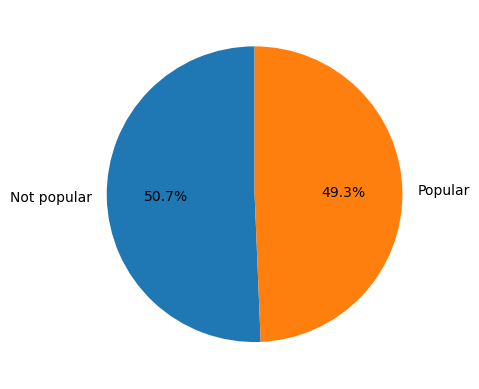

In [10]:
sizes = [zeroes / len(Y), ones / len(Y)]
labels = ['Not popular', 'Popular']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', startangle = 90)
plt.show()

In [11]:
data = data.drop(' shares', axis = 1)
X = data

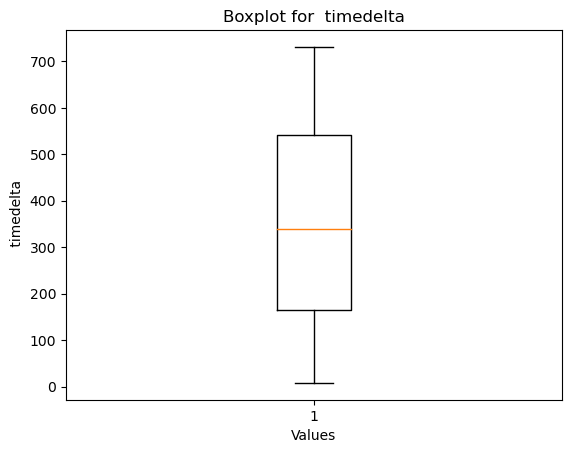

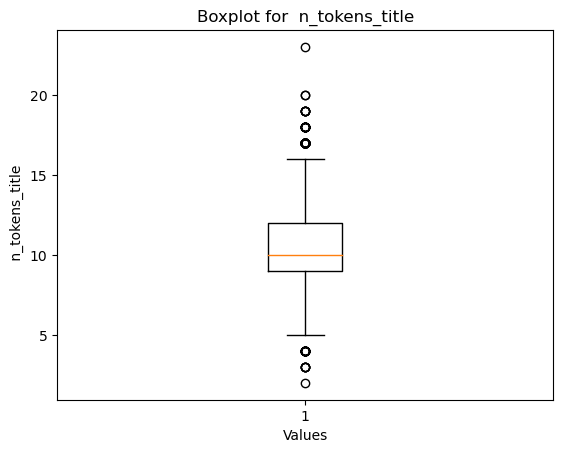

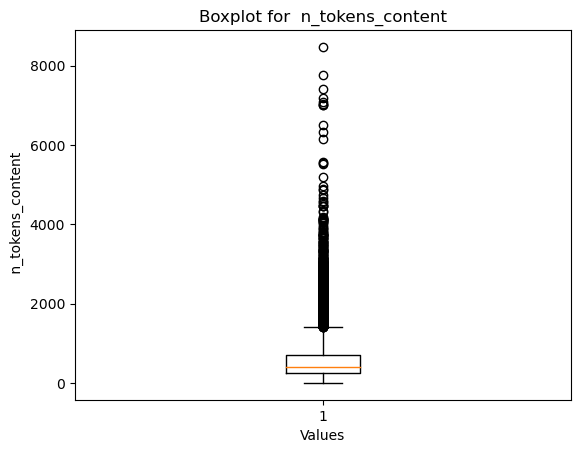

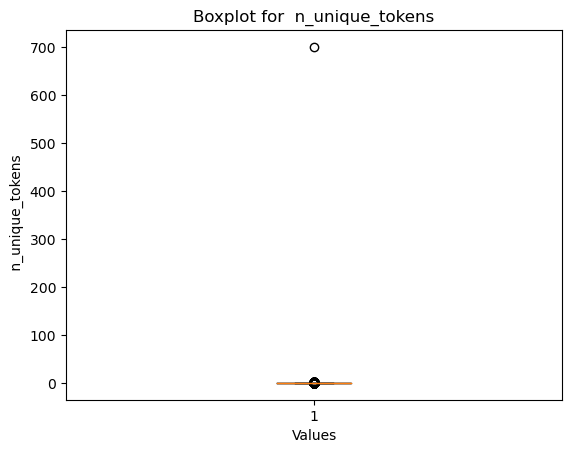

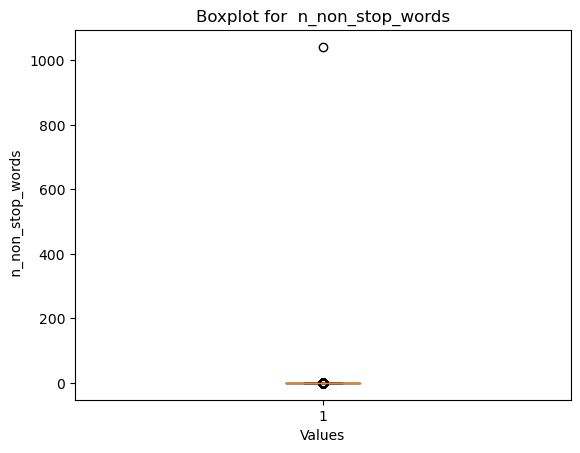

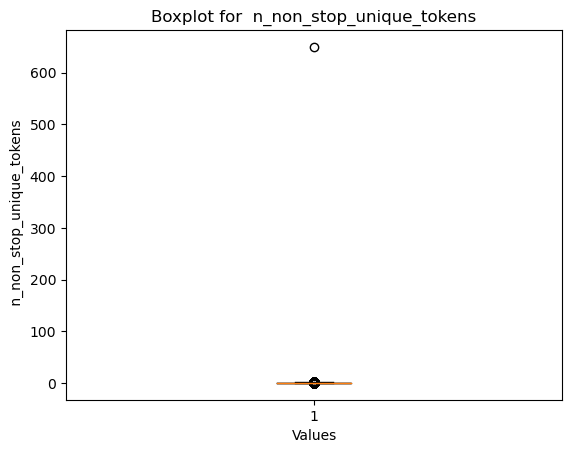

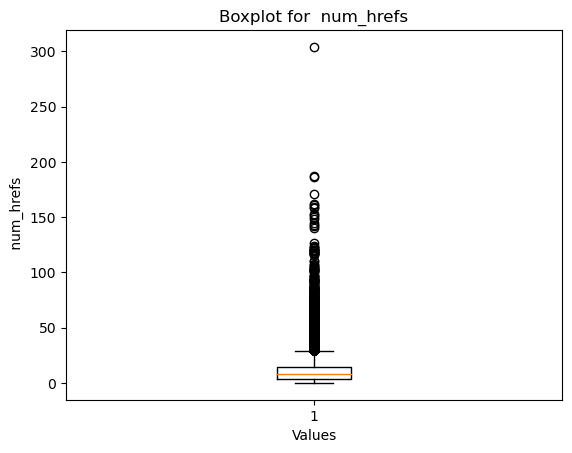

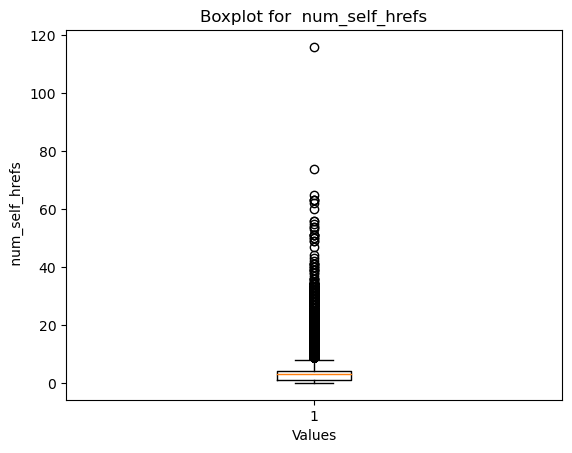

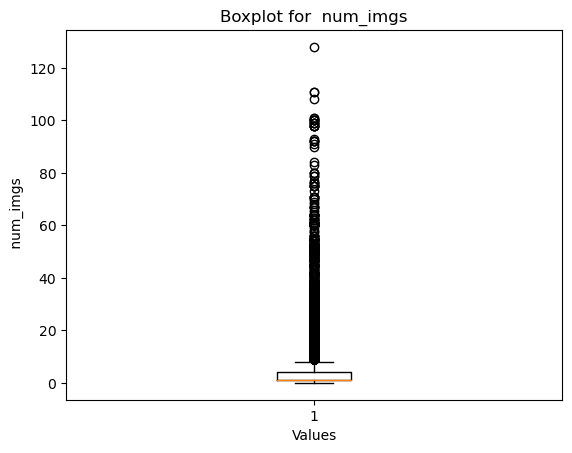

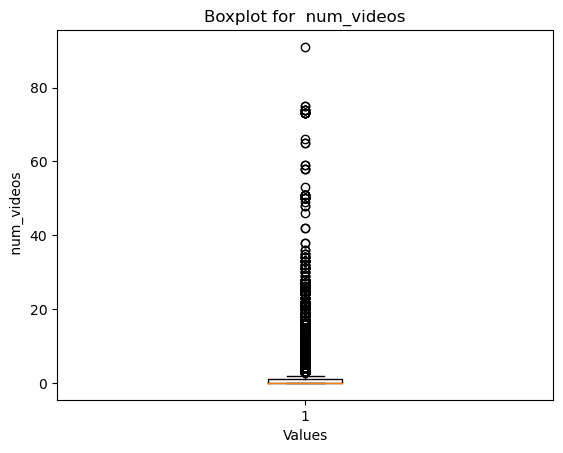

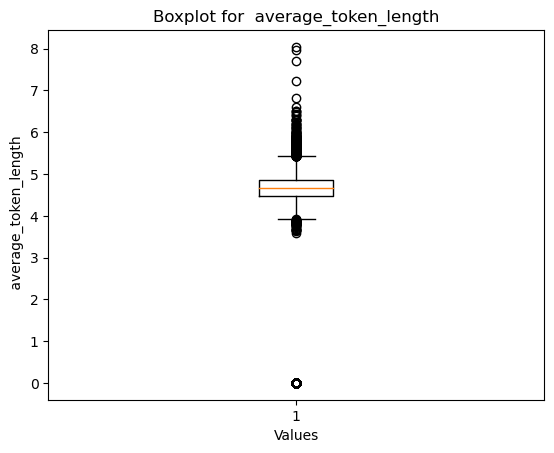

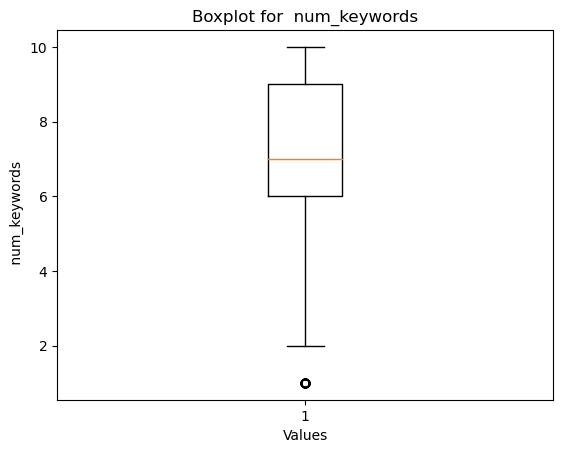

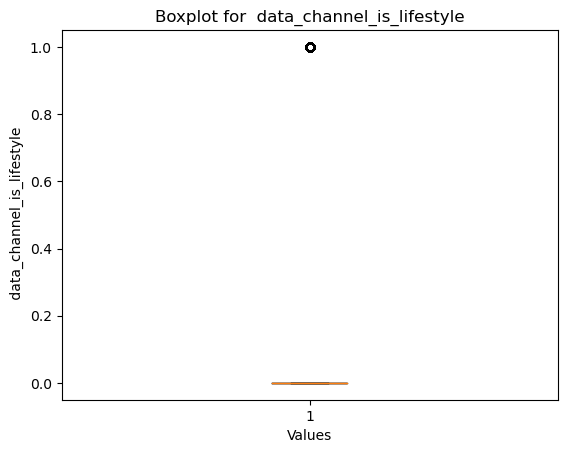

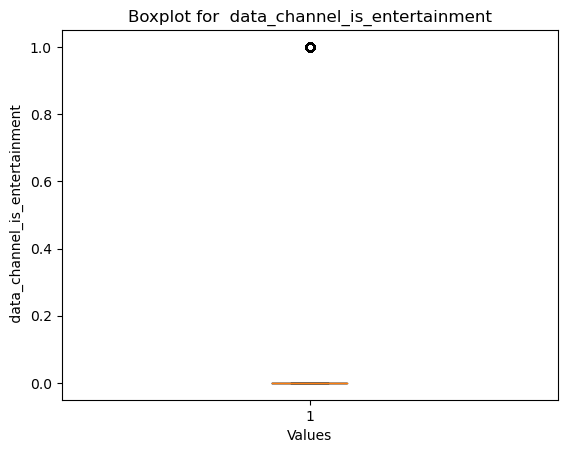

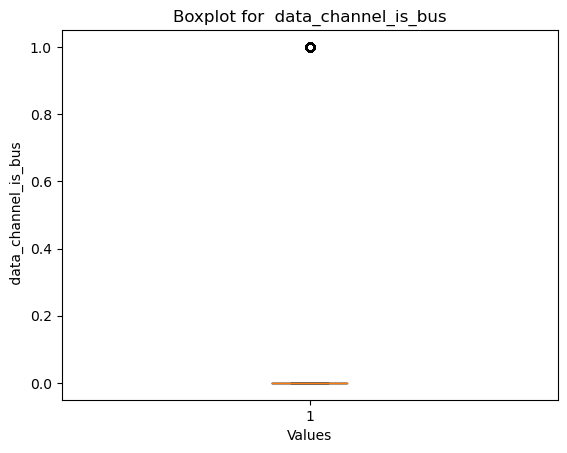

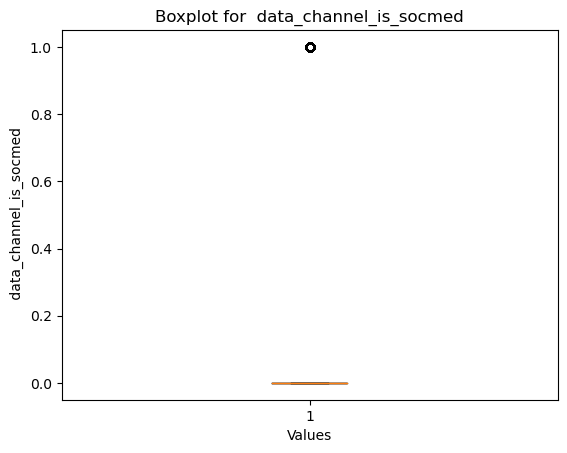

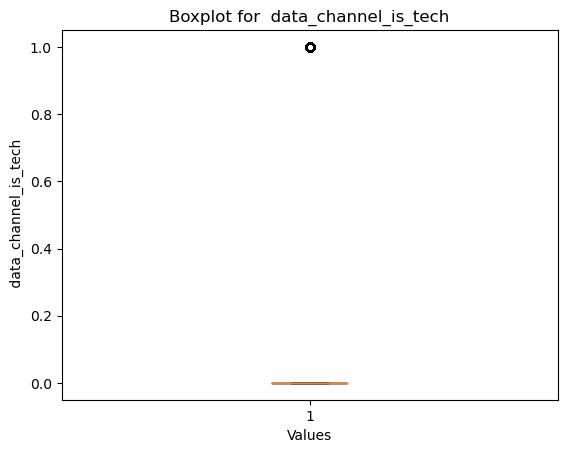

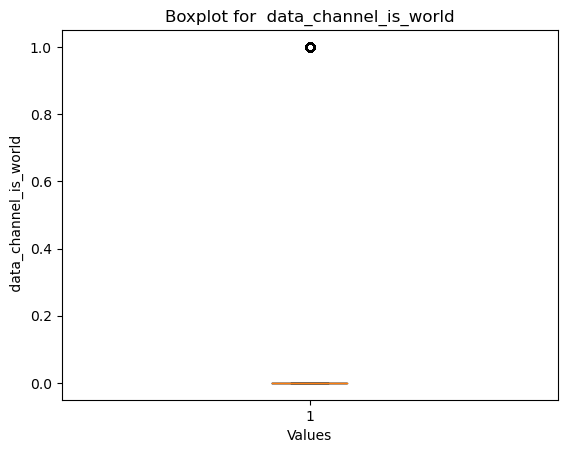

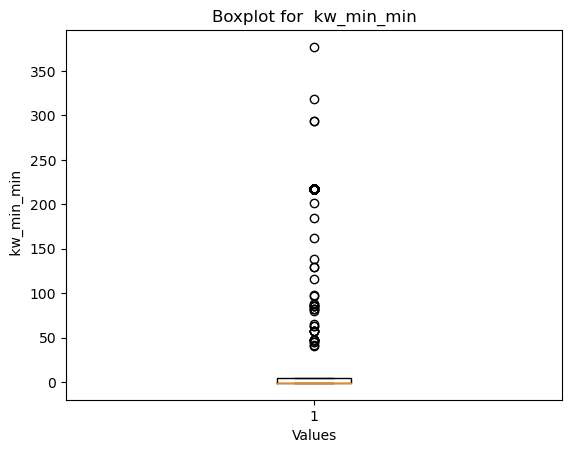

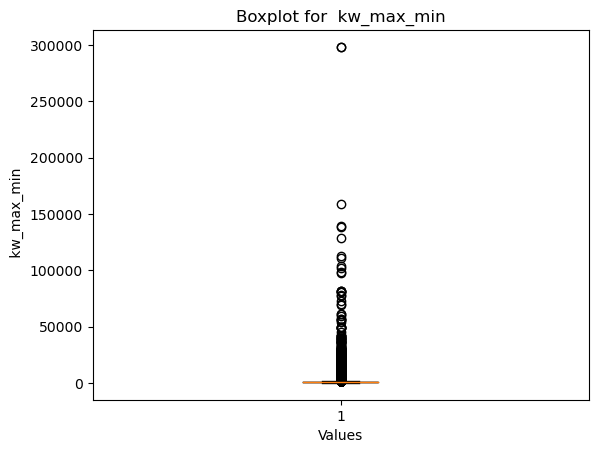

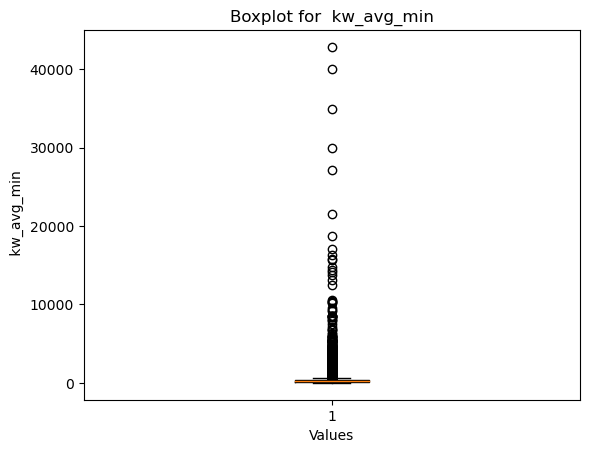

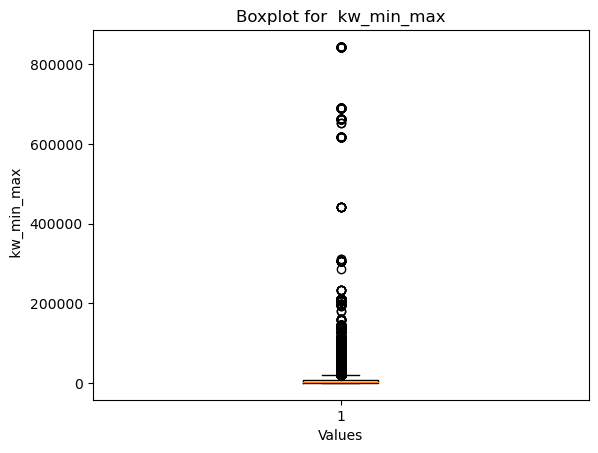

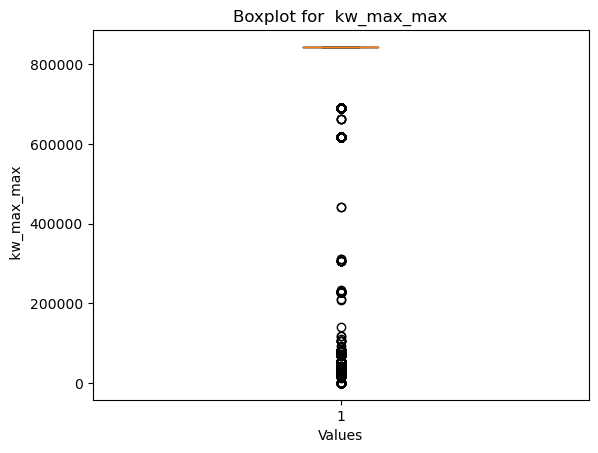

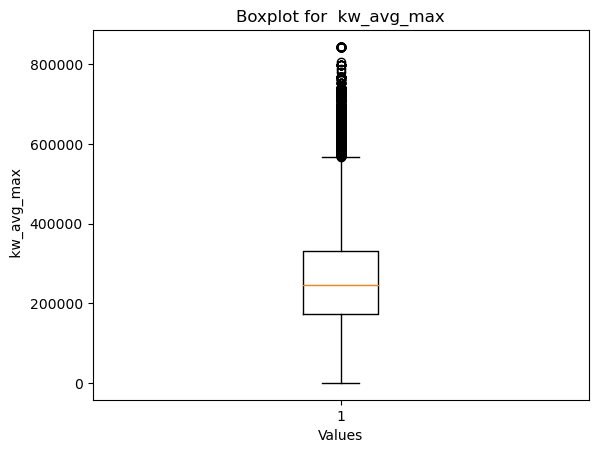

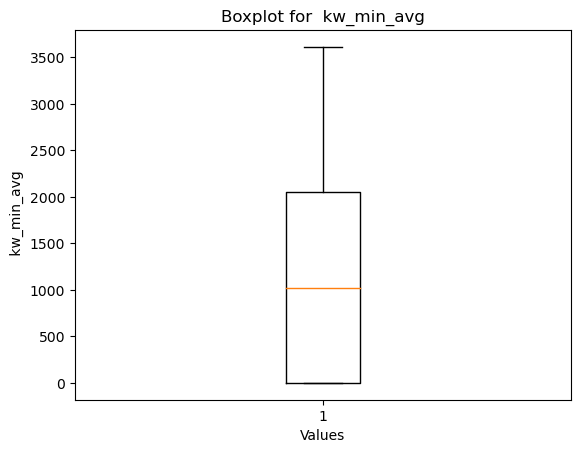

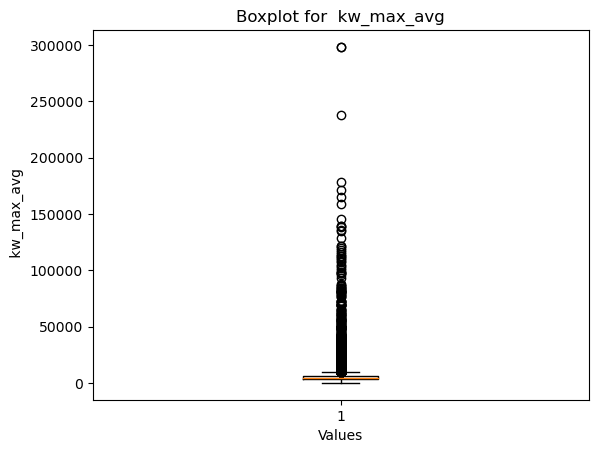

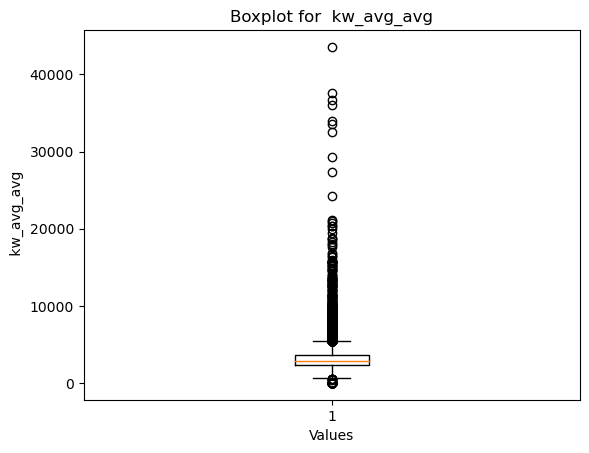

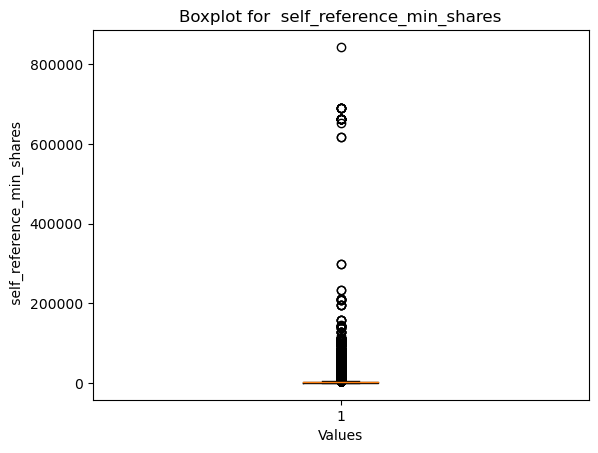

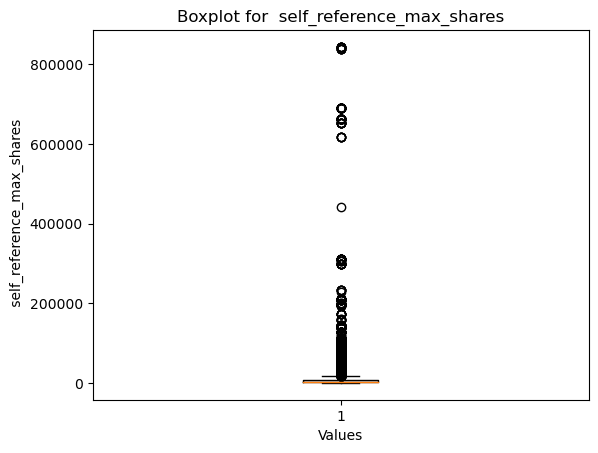

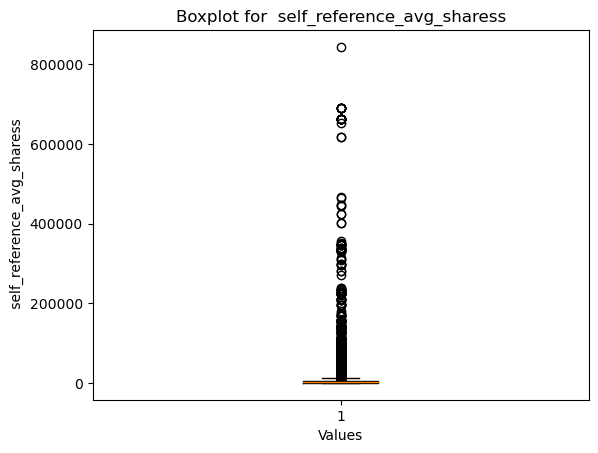

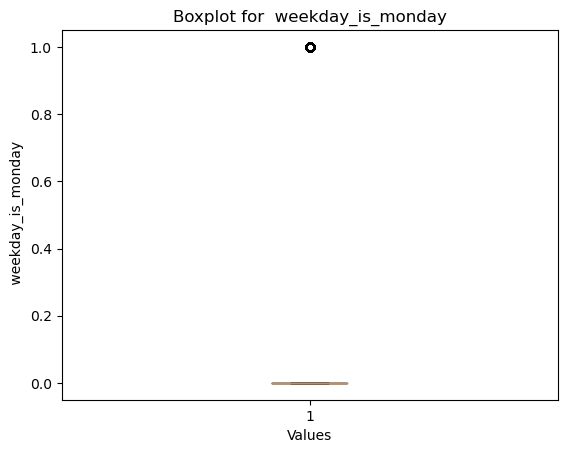

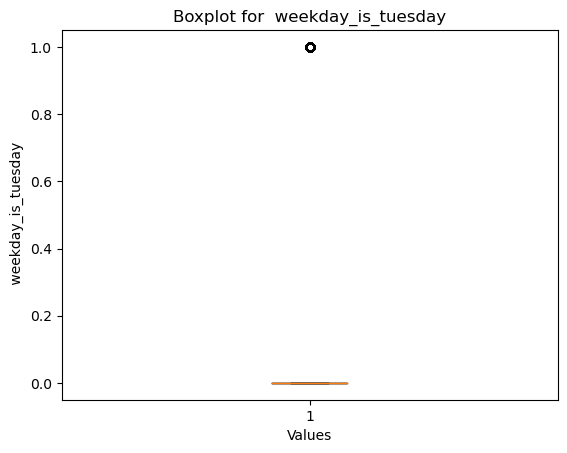

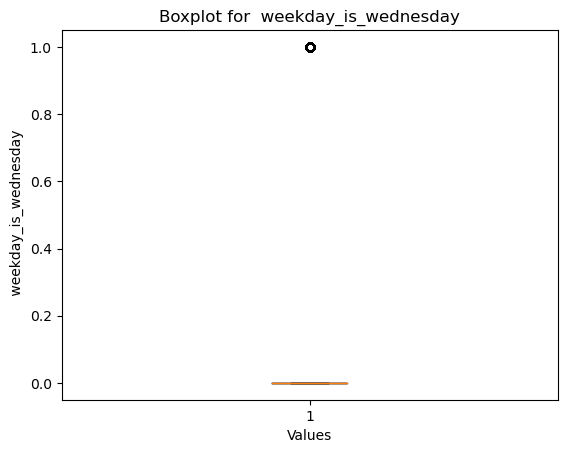

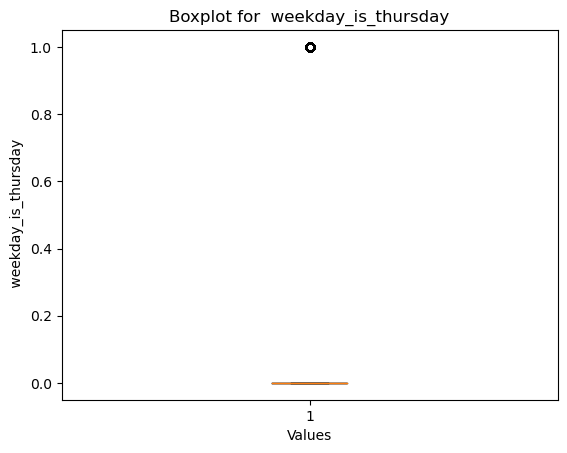

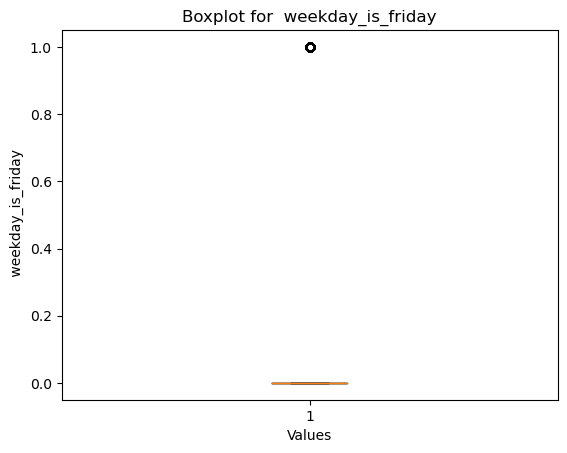

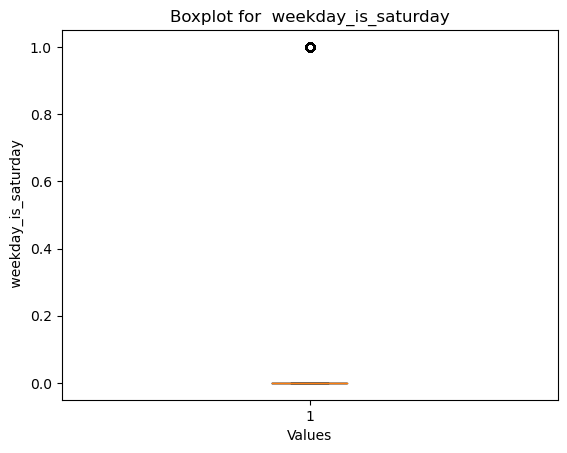

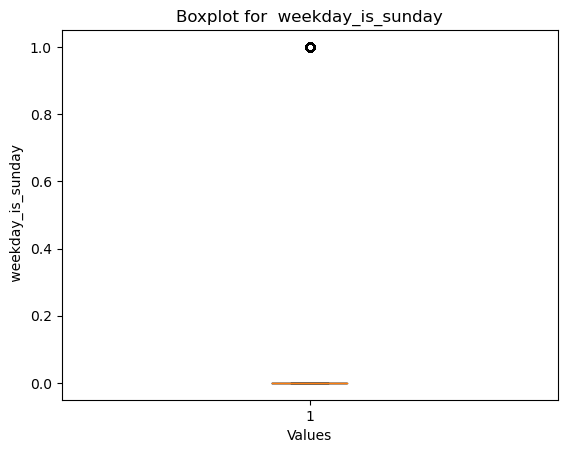

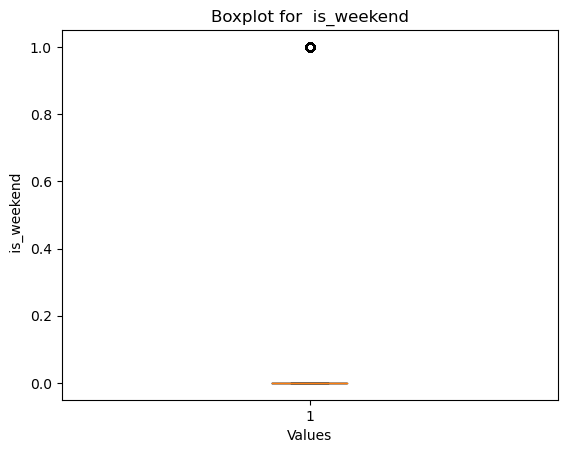

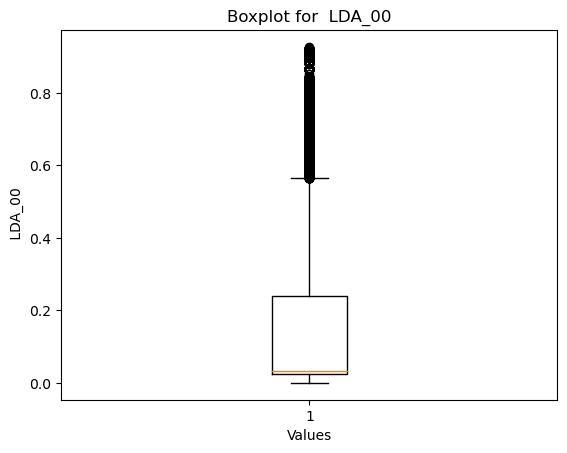

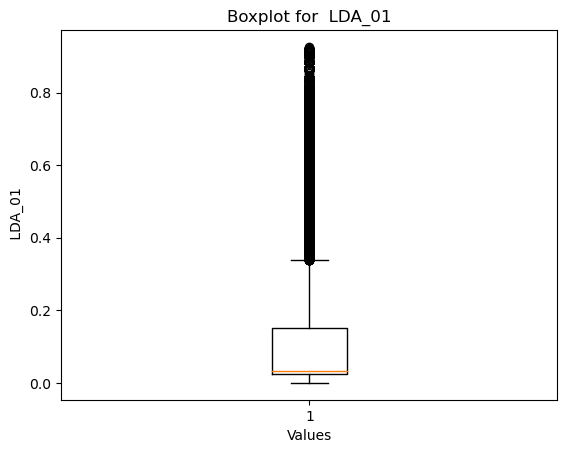

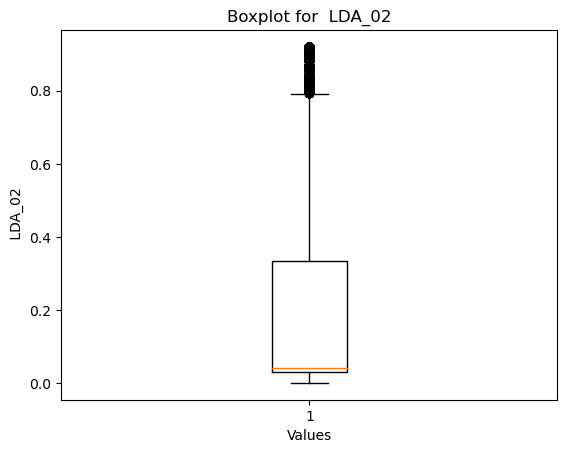

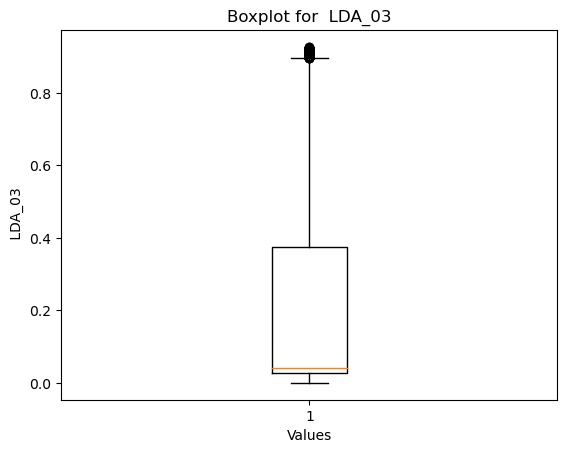

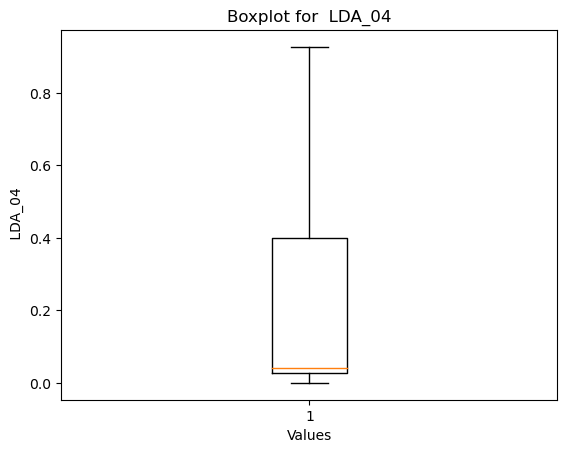

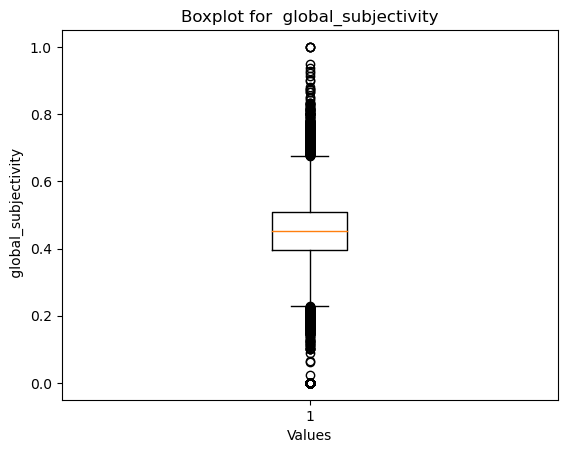

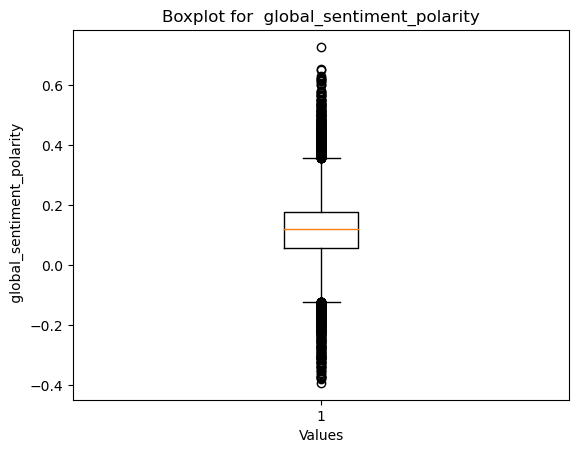

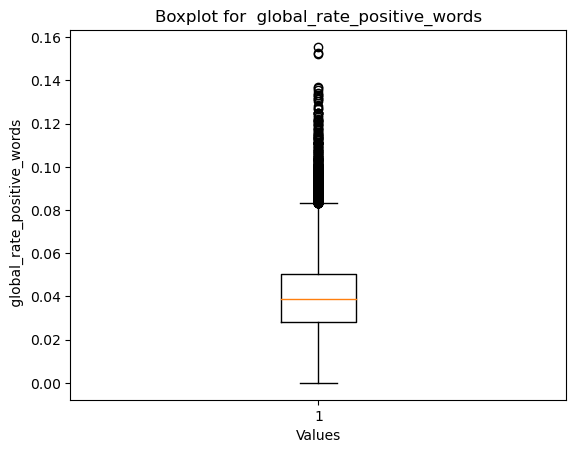

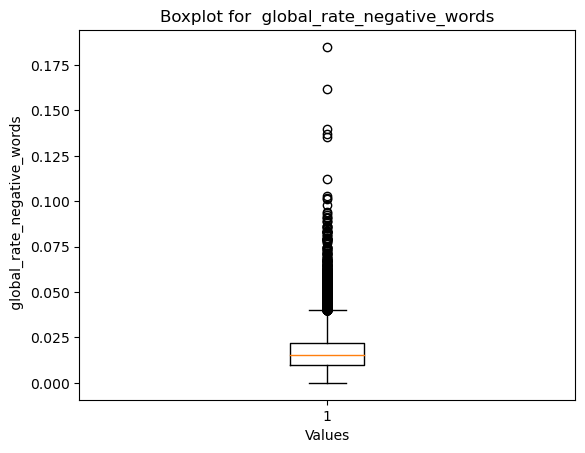

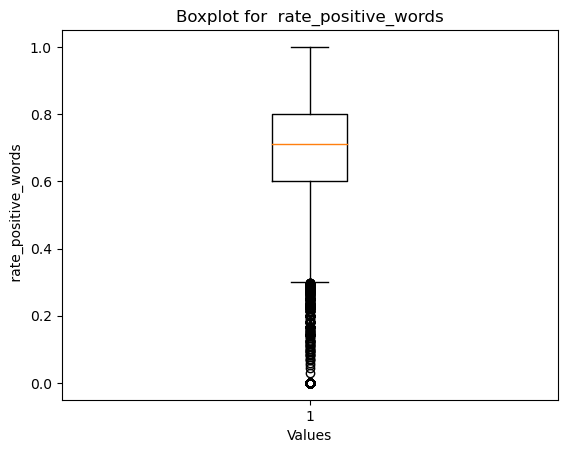

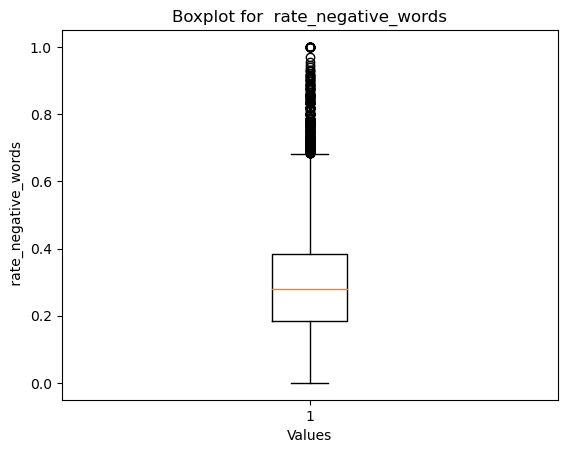

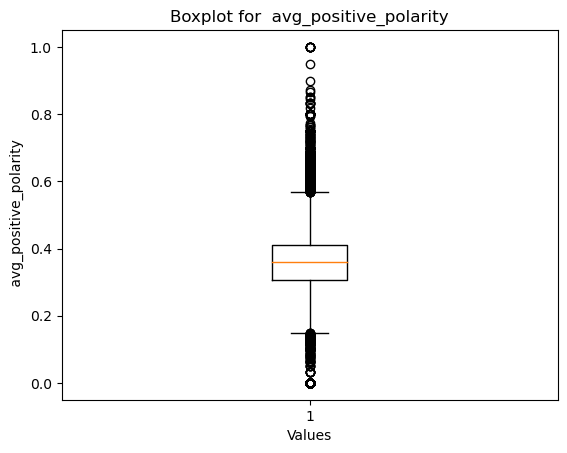

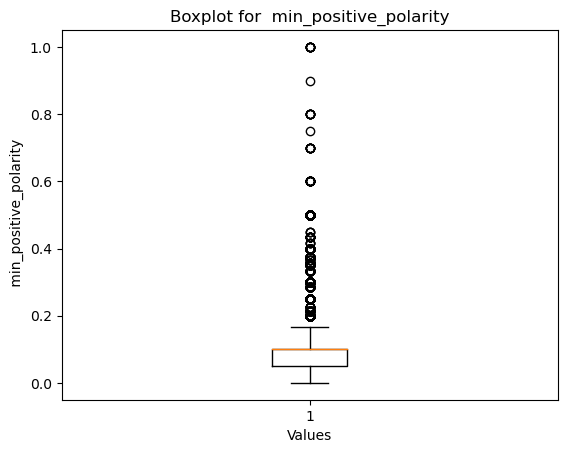

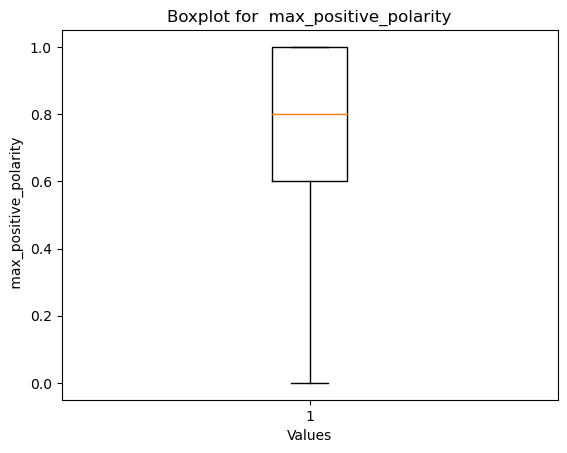

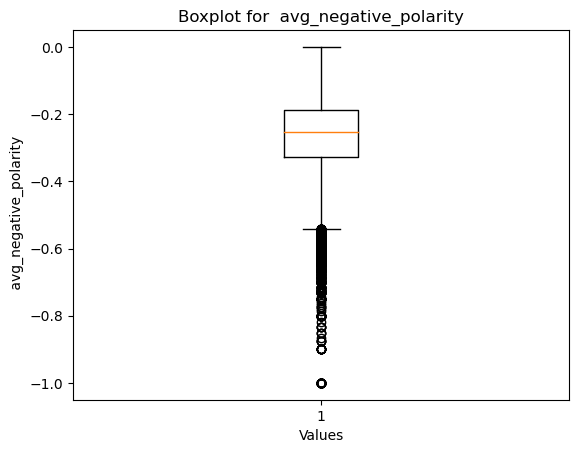

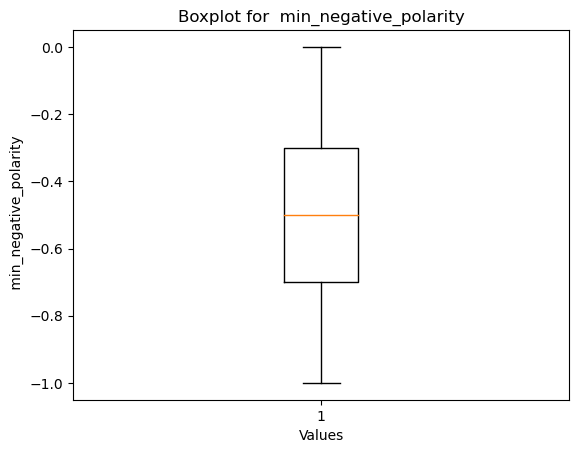

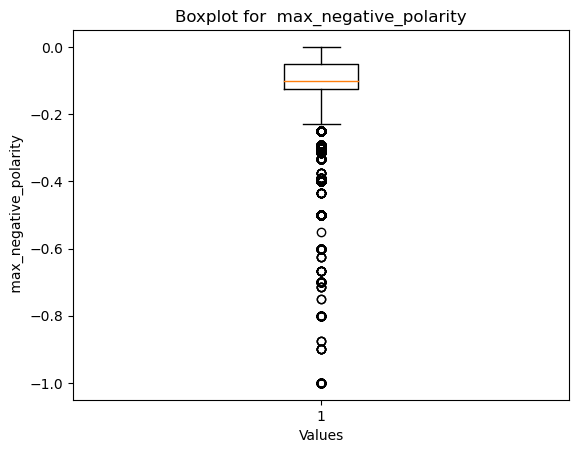

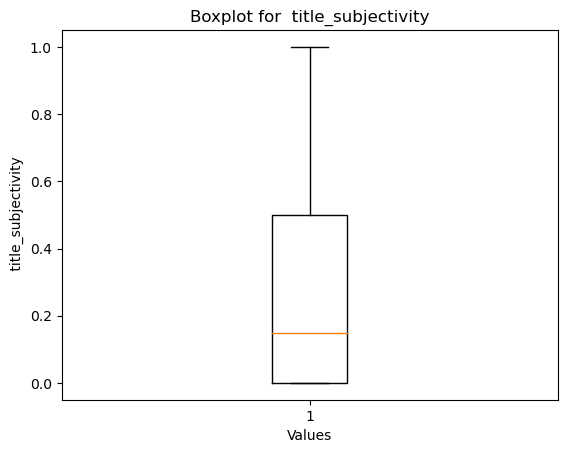

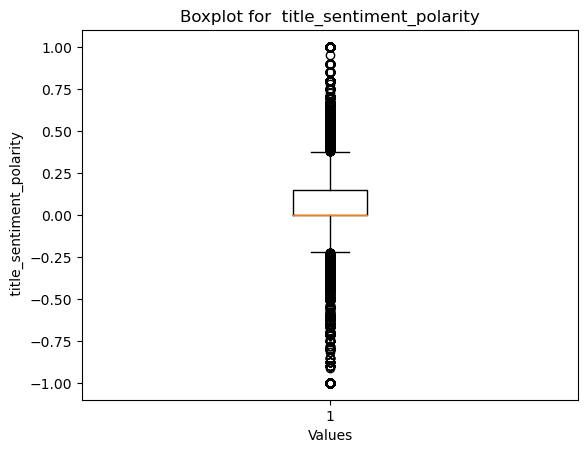

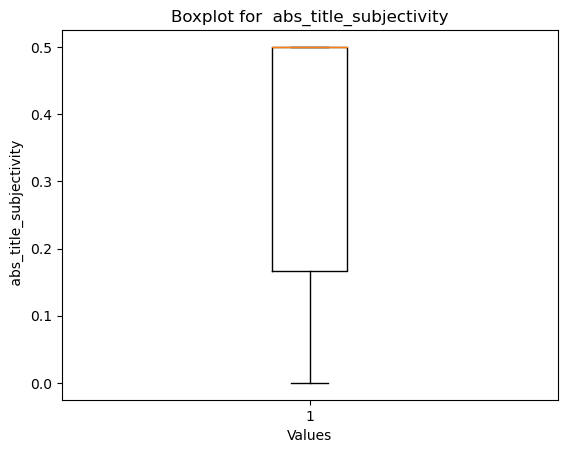

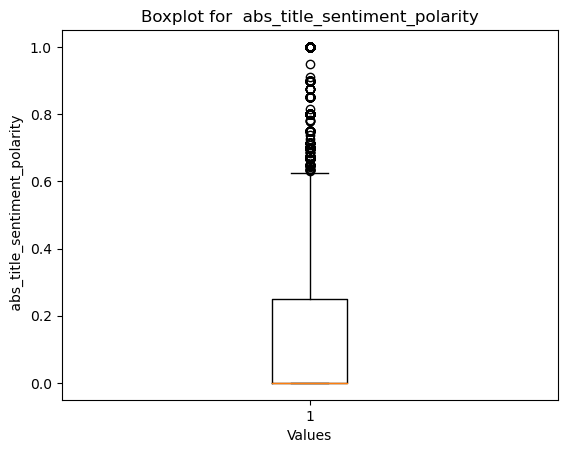

In [12]:
for column in X.columns:
    plt.figure()
    plt.boxplot(X[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel('Values')
    plt.ylabel(column)
    plt.show()

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [14]:
%store X
%store Y
%store X_train
%store X_test
%store Y_train
%store Y_test

Stored 'X' (DataFrame)
Stored 'Y' (list)
Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'Y_train' (list)
Stored 'Y_test' (list)


In [15]:
#preuzeto sa vezbi
def IQR(data, feature_names):
    
    iqr = pd.DataFrame(0, index=feature_names, columns=['lower', 'min', 'num_lower', 'upper', 'max', 'num_upper', 'percantage'])
    
    for name in feature_names:
        (Q1, Q3) = X[name].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        upper = Q3 + (1.5 * IQR)
        lower = Q1 - (1.5 * IQR)
        
        iqr.loc[name, 'upper'] = upper
        iqr.loc[name, 'lower'] = lower

        num_of_out_lower = (X[name] < lower).sum()
        num_of_out_upper = (X[name] > upper).sum()

        percentage = round((num_of_out_lower + num_of_out_upper) / X.shape[0] * 100)

        iqr.loc[name, 'num_lower'], iqr.loc[name, 'num_upper'], iqr.loc[name, 'percantage']  = num_of_out_lower, num_of_out_upper, percentage
        iqr.loc[name, 'min'], iqr.loc[name, 'max'] = min(X[name]), max(X[name])
    
    return iqr

In [17]:
iqr_train = IQR(X_train, X.columns)
print(iqr_train)

                                       lower      min  num_lower   
 timedelta                     -4.030000e+02  8.00000          0  \
 n_tokens_title                 4.500000e+00  2.00000         34   
 n_tokens_content              -4.590000e+02  0.00000          0   
 n_unique_tokens                2.641326e-01  0.00000       1308   
 n_non_stop_words               1.000000e+00  0.00000       2826   
 n_non_stop_unique_tokens       4.324041e-01  0.00000       1591   
 num_hrefs                     -1.100000e+01  0.00000          0   
 num_self_hrefs                -3.500000e+00  0.00000          0   
 num_imgs                      -3.500000e+00  0.00000          0   
 num_videos                    -1.500000e+00  0.00000          0   
 average_token_length           3.913752e+00  0.00000       1236   
 num_keywords                   1.500000e+00  1.00000         51   
 data_channel_is_lifestyle      0.000000e+00  0.00000          0   
 data_channel_is_entertainment  0.000000e+00  0.

In [18]:
iqr_train_lower = iqr_train['lower']
iqr_train_higher = iqr_train['upper']

In [37]:
#replace outliers with limit values
#capping the outliers

for column in X_train.columns:
    maximum = iqr_train_higher[column]
    X_train[column] = [maximum if x > maximum else x for x in X_train[column]]
    
    
    
for column in X_train.columns:    
    minimum = iqr_train_lower[column]
    X_train[column] = [minimum if x < minimum else x for x in X_train[column]]
    
    
    '''for i, item in enumerate(X_train[column]):
        if(item < minimum):
            X_train[column][i] = minimum
        elif(item > maximum):
            X_train[column][i] = maximum'''
            
    '''for i in range(0, len(X[column])):
        if X[column][i] < minimum:
            X[column][i] = minimum
        elif X[column][i] > maximum:
            X[column][i] = maximum'''

In [38]:
for column in X.columns:
    maximum = iqr_train_higher[column]
    for item in X_train[column]:
        if(item > maximum):
            print(item)
        elif(item < minimum):
            print(item)

-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0
-459.0

-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987
-124.67687465749987


-0.386419753086
-0.540599322269375
-0.441307277628
-0.397222222222
-0.4125
-0.540599322269375
-0.433333333333
-0.540599322269375
-0.540599322269375
-0.386742424242
-0.404056906451
-0.513888888889
-0.421875
-0.417063492063
-0.388409961686
-0.389935064935
-0.391468253968
-0.540599322269375
-0.540599322269375
-0.432321428571
-0.440178571429
-0.479365079365
-0.435416666667
-0.540599322269375
-0.403125
-0.395588235294
-0.540599322269375
-0.404166666667
-0.418387276786
-0.4
-0.414285714286
-0.540599322269375
-0.394069069069
-0.540599322269375
-0.540599322269375
-0.540599322269375
-0.405989010989
-0.389743589744
-0.540599322269375
-0.427777777778
-0.540599322269375
-0.540599322269375
-0.441666666667
-0.379166666667
-0.540599322269375
-0.540599322269375
-0.396474358974
-0.4
-0.5375
-0.540599322269375
-0.540599322269375
-0.480555555556
-0.540599322269375
-0.441829004329
-0.3875
-0.45
-0.540599322269375
-0.540599322269375
-0.490909090909
-0.383333333333
-0.434722222222
-0.475
-0.463333333333
-0.

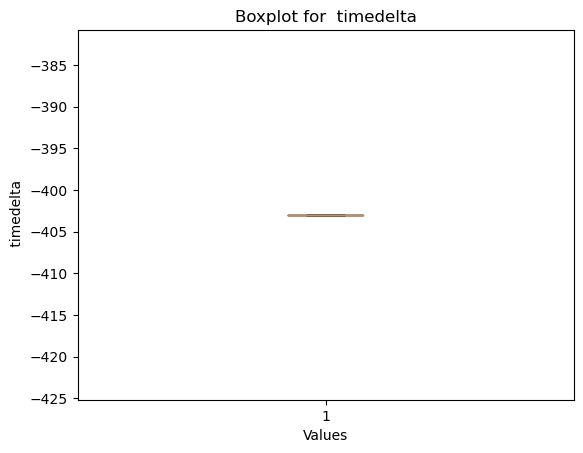

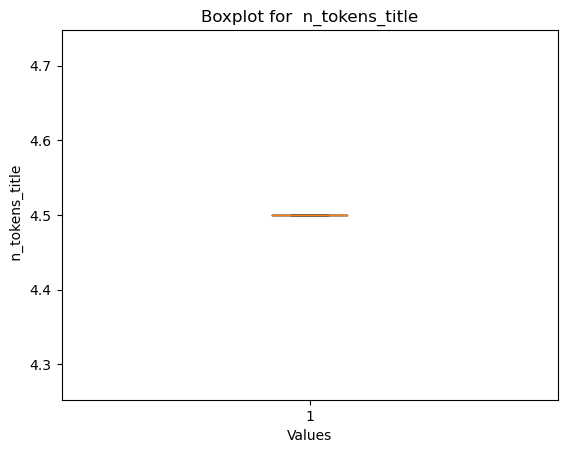

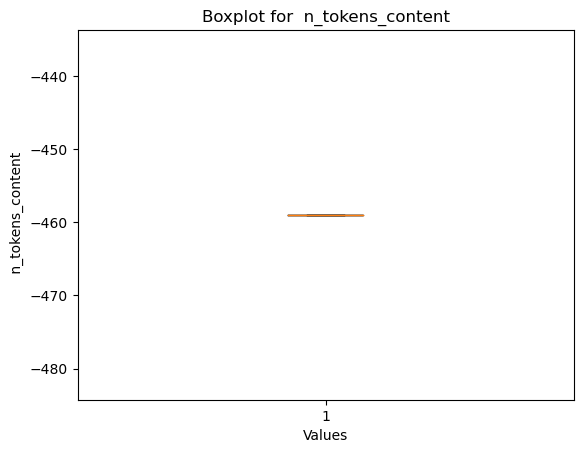

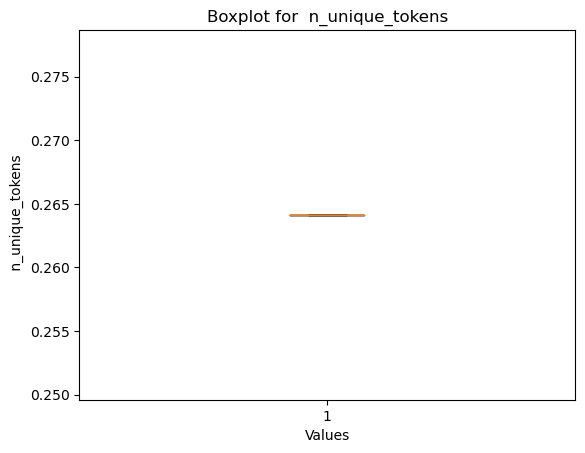

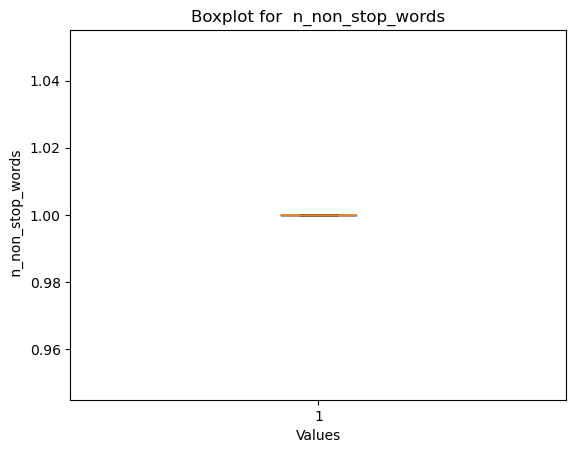

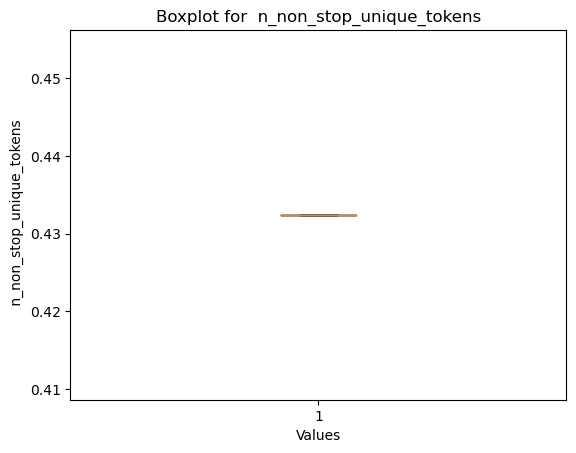

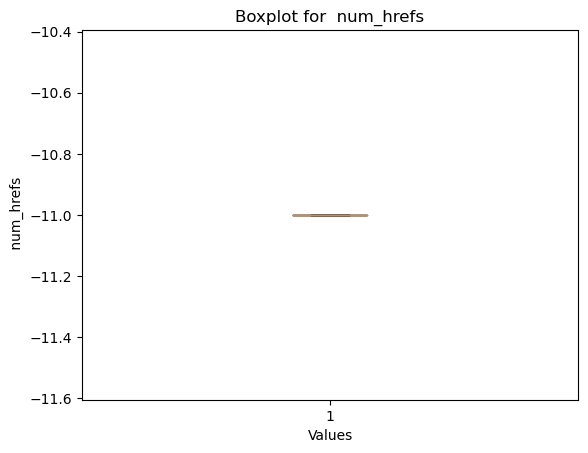

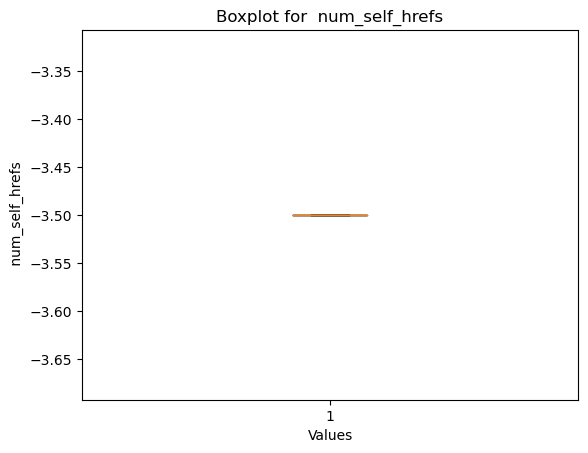

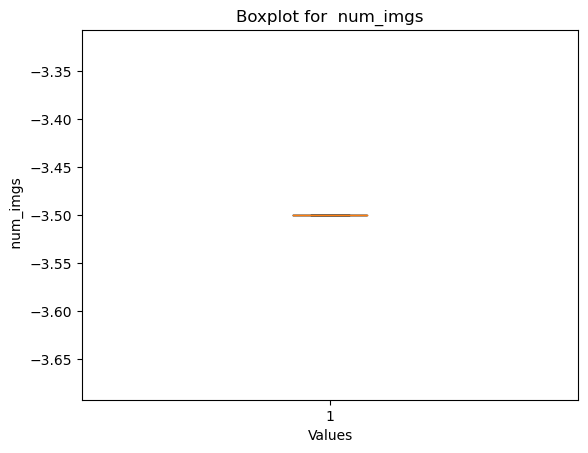

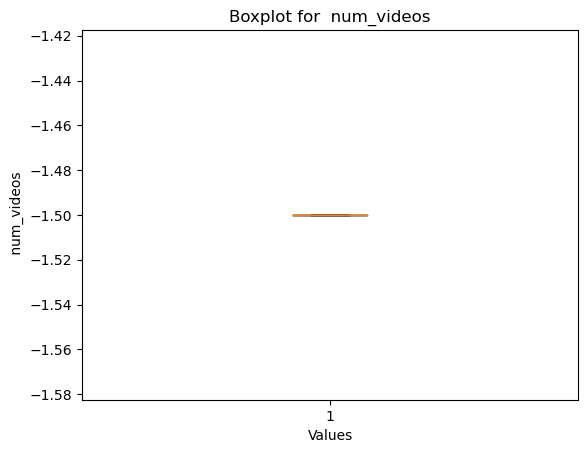

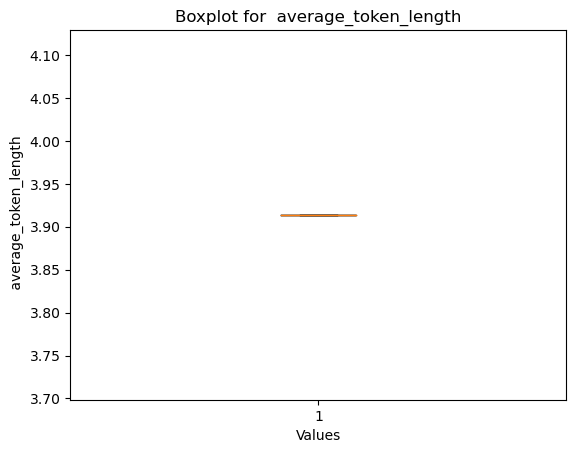

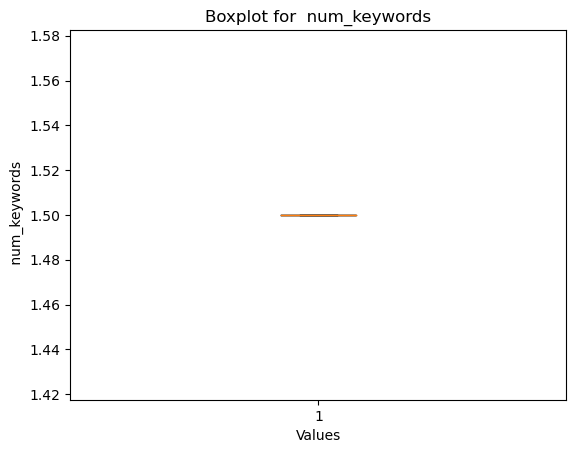

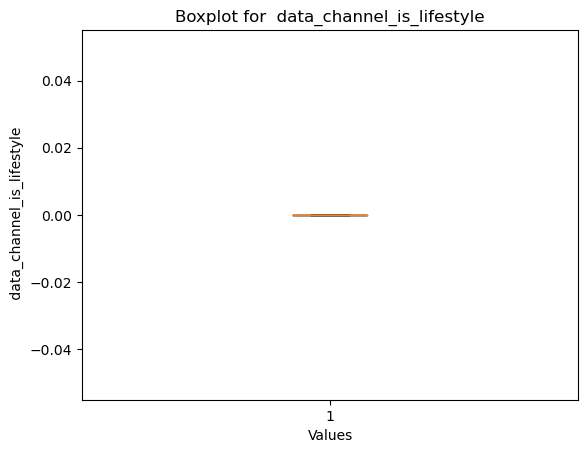

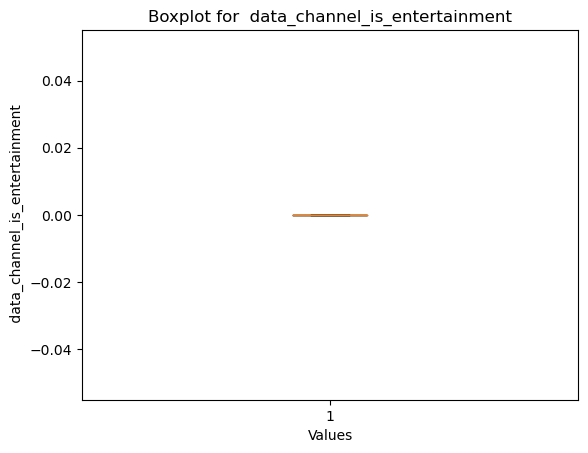

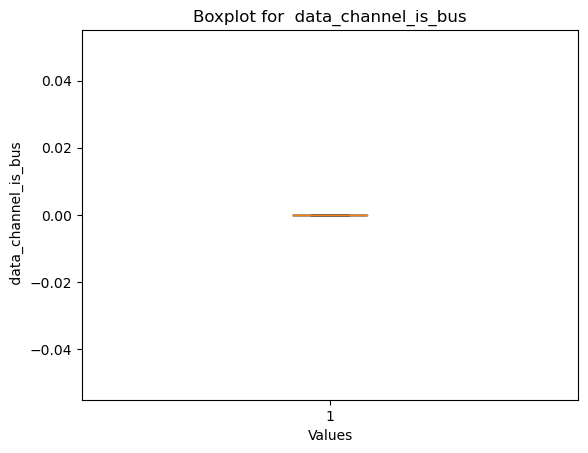

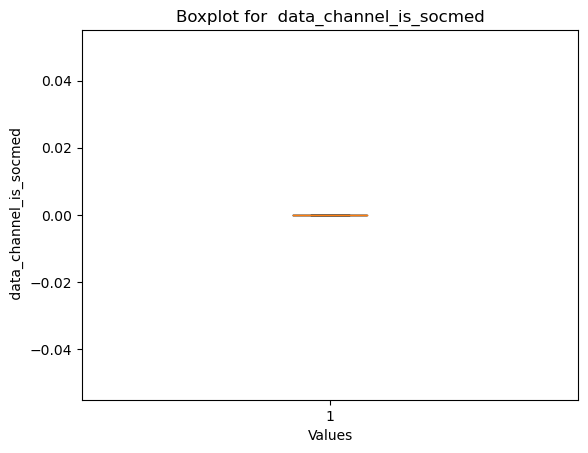

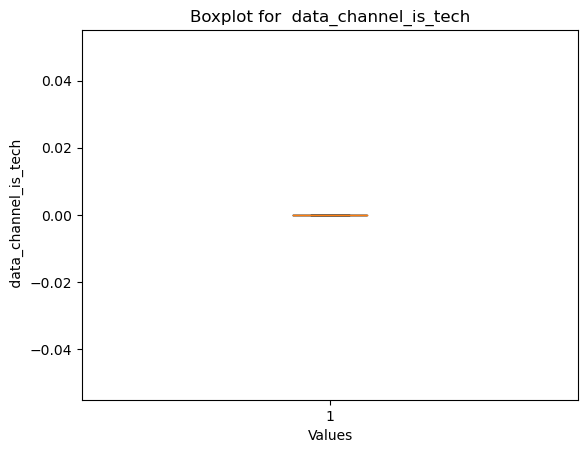

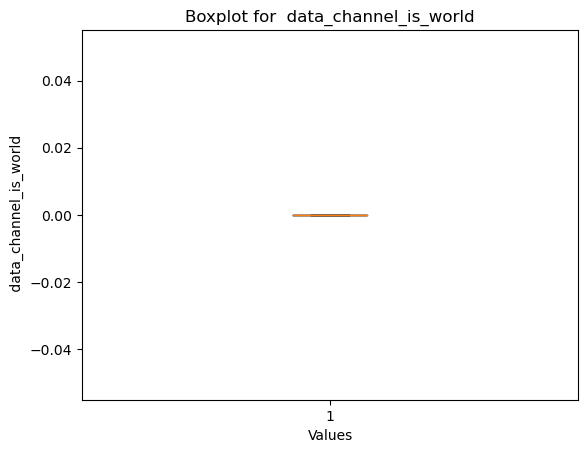

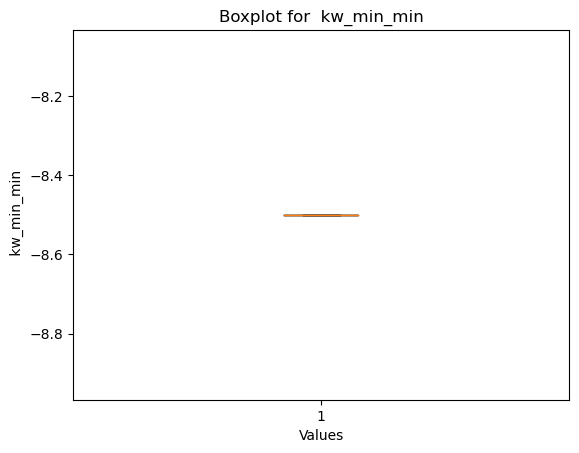

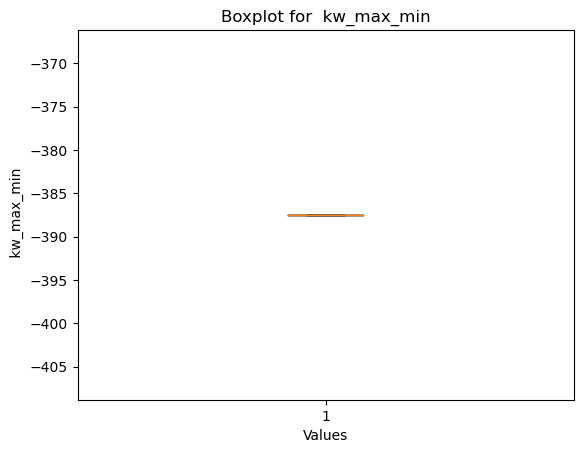

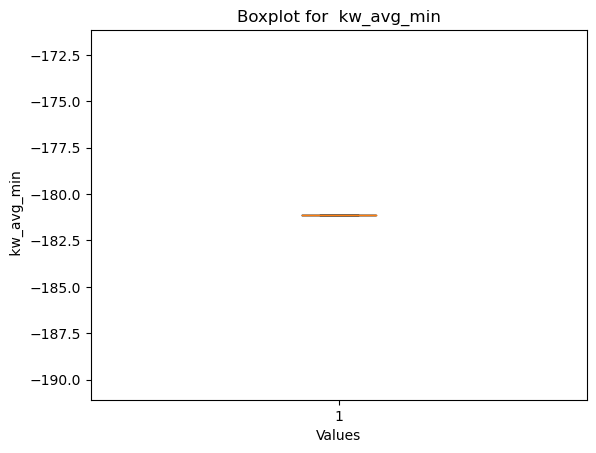

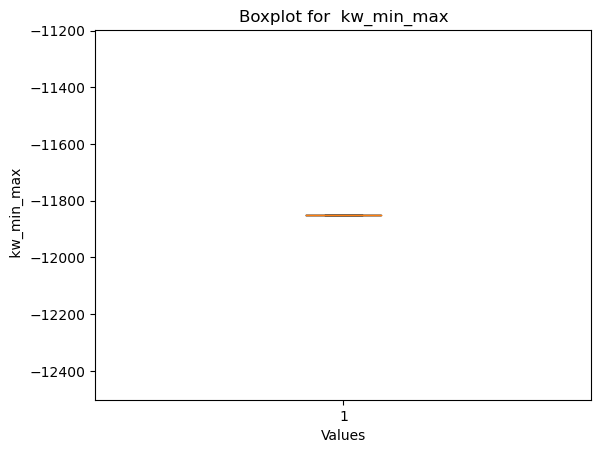

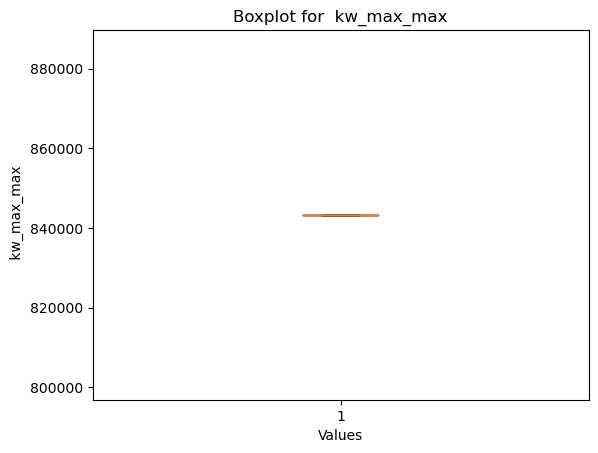

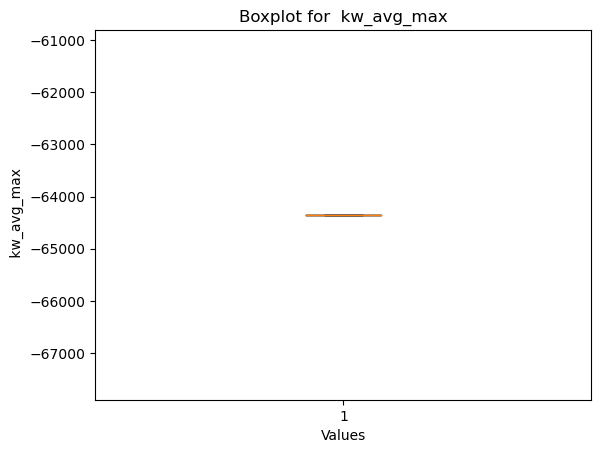

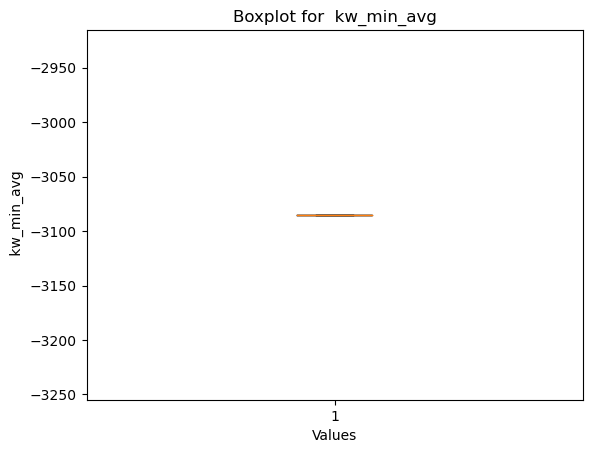

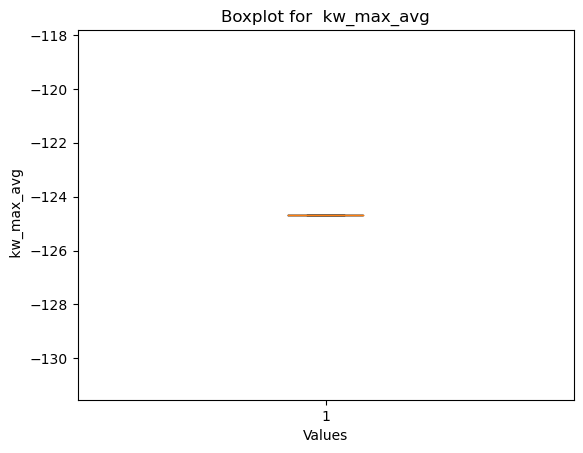

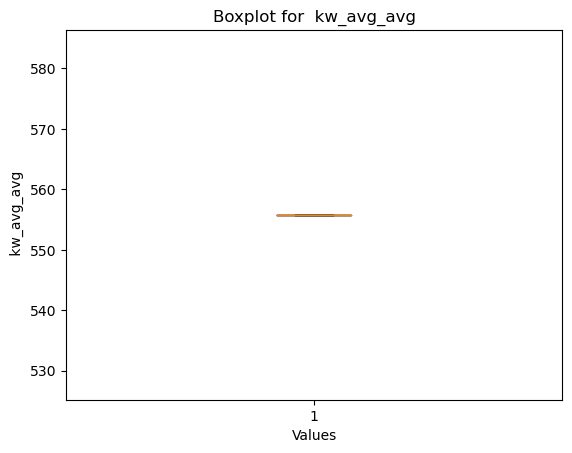

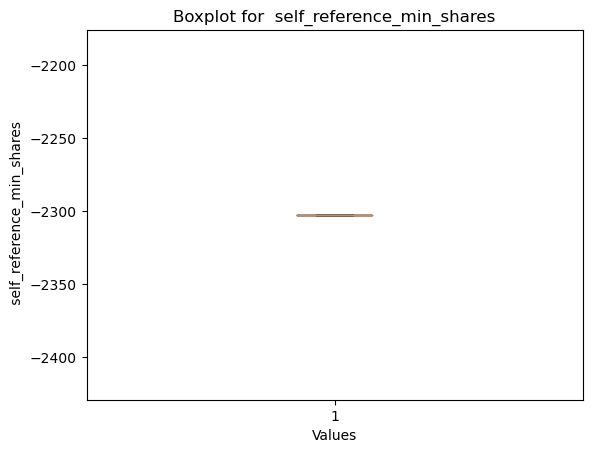

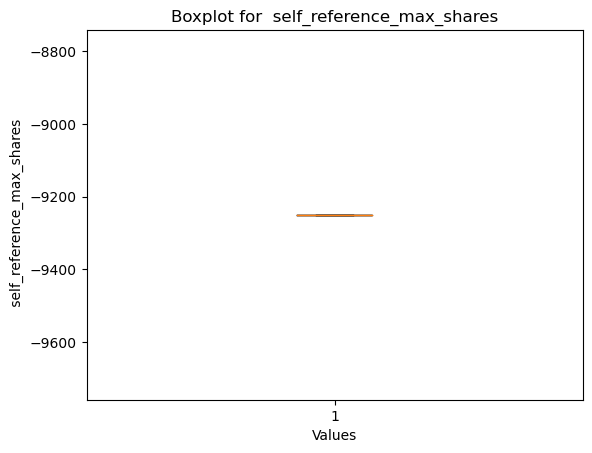

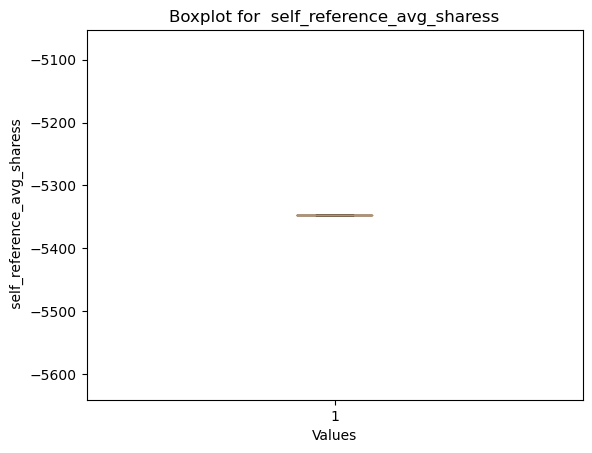

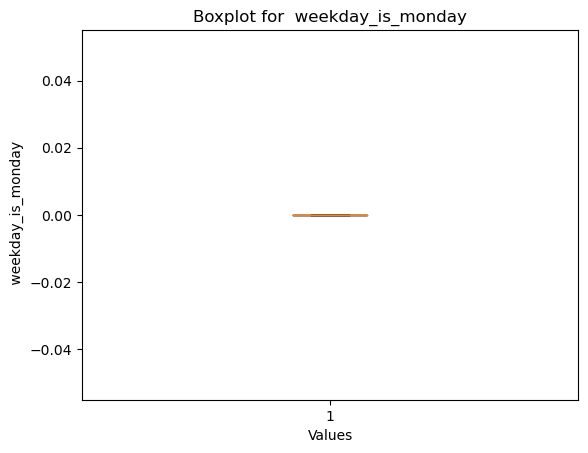

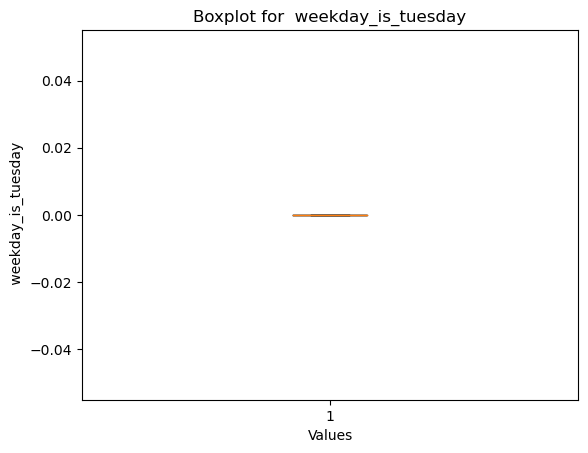

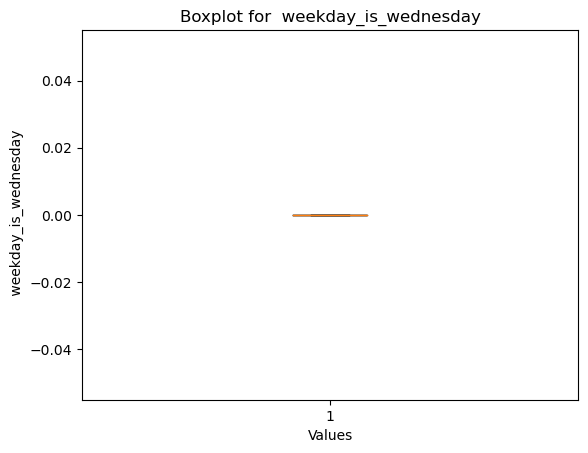

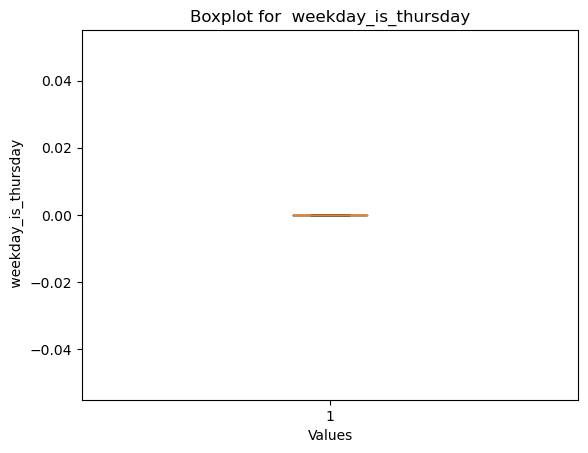

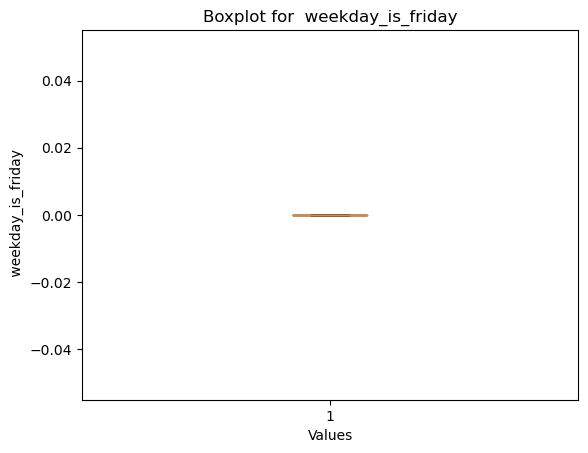

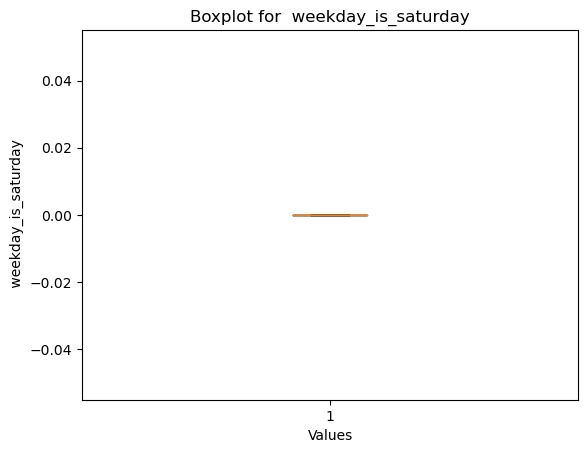

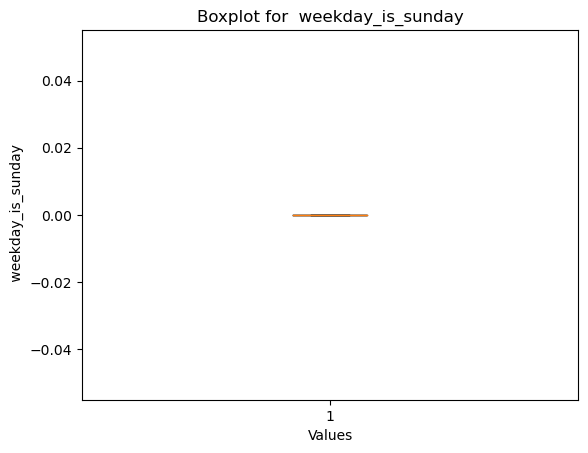

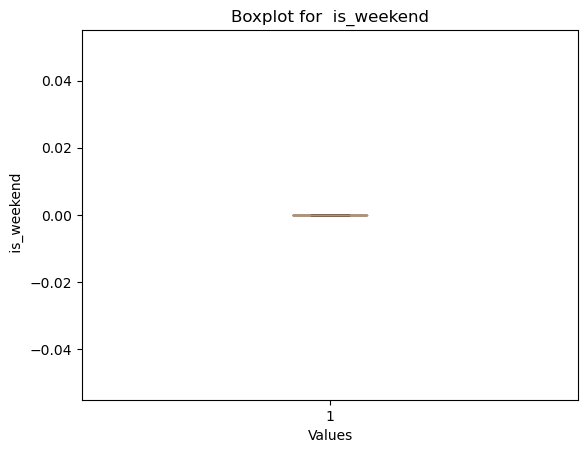

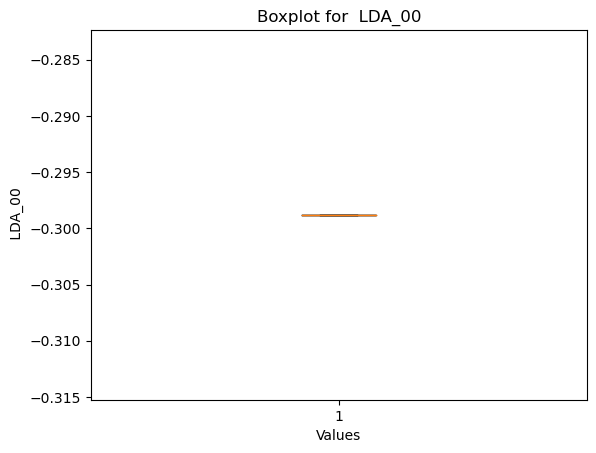

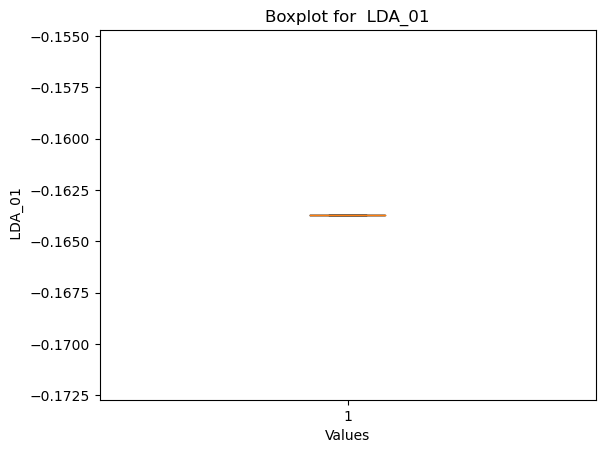

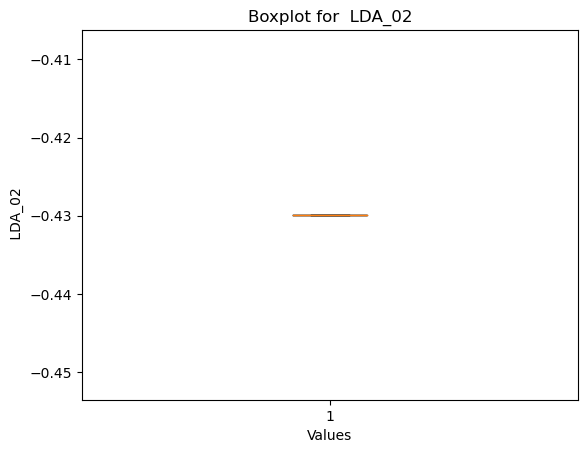

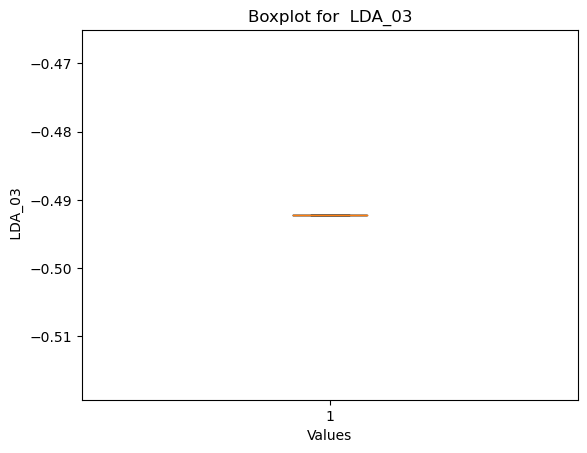

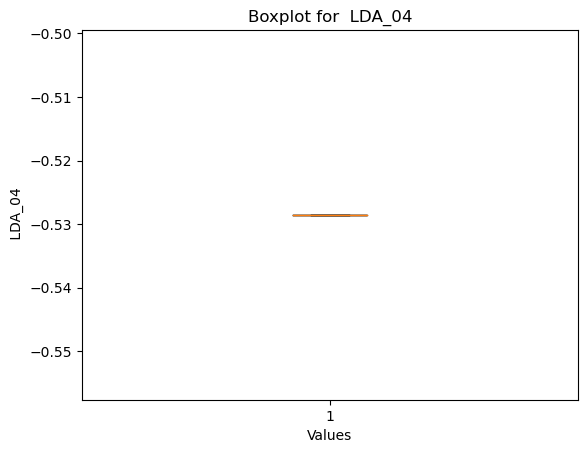

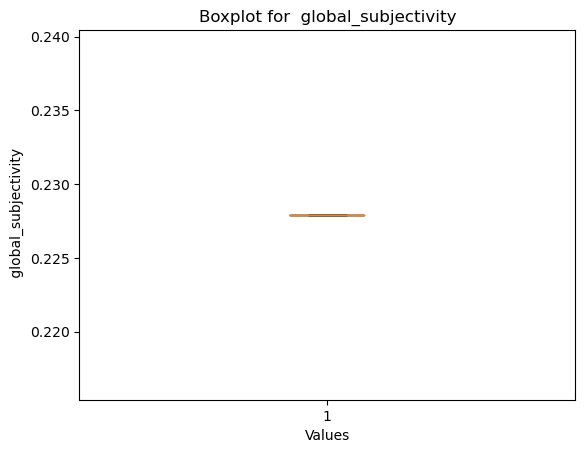

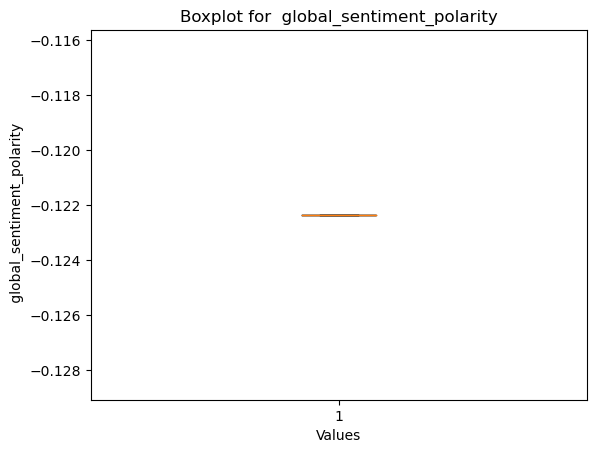

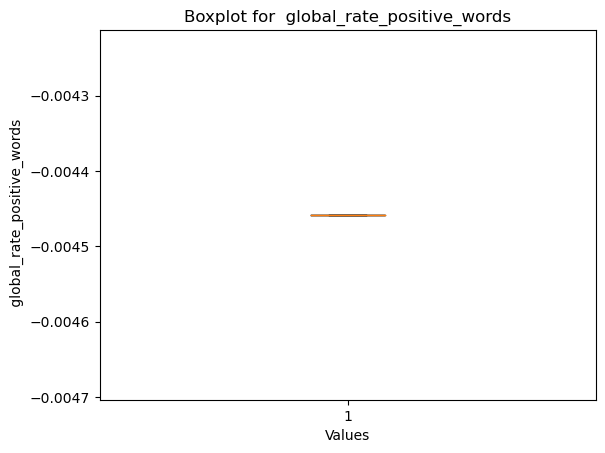

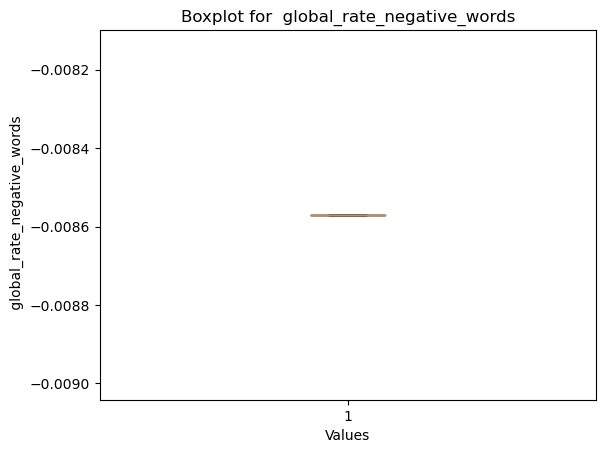

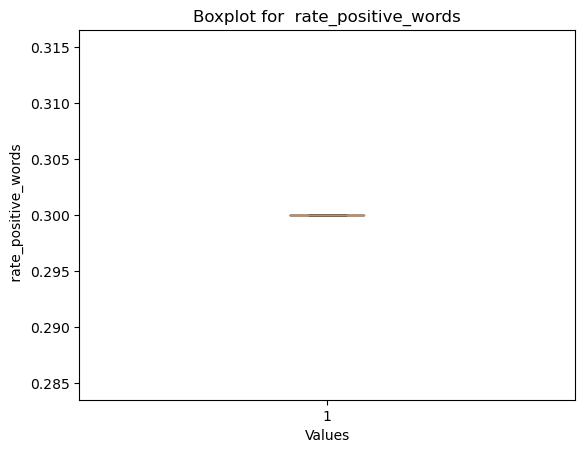

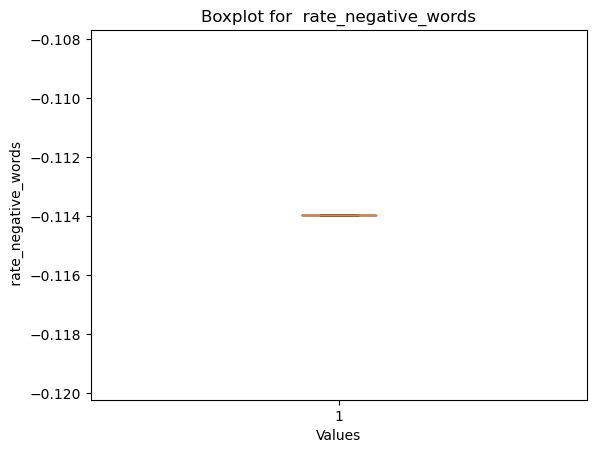

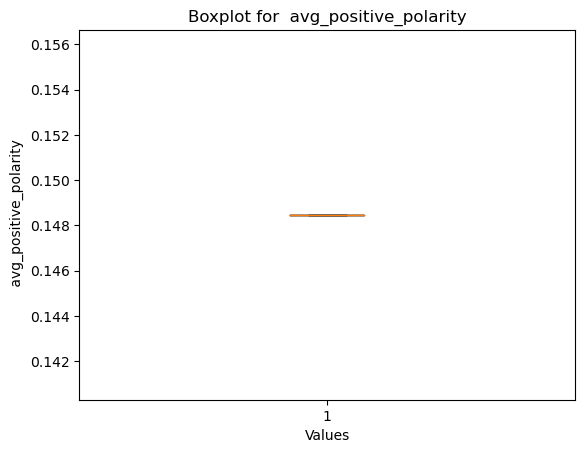

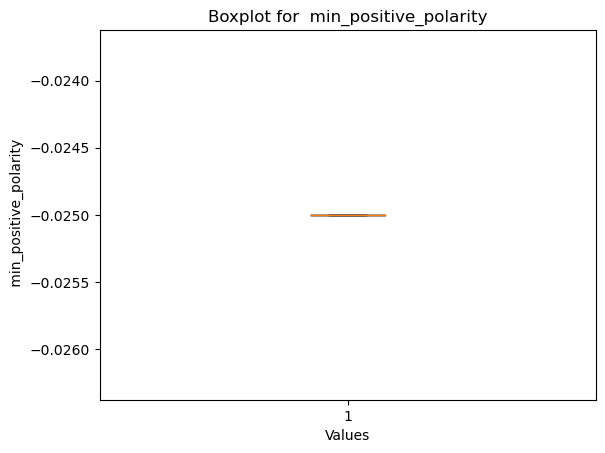

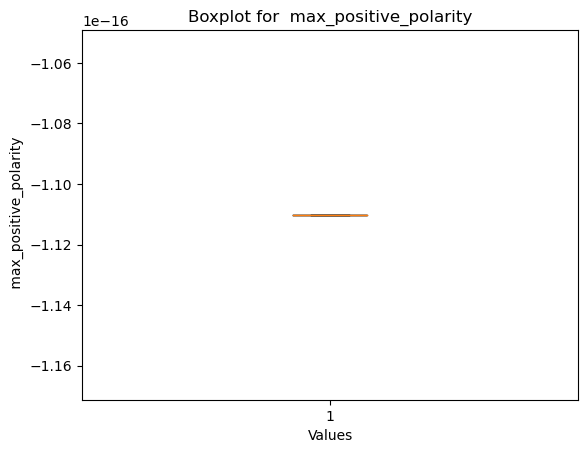

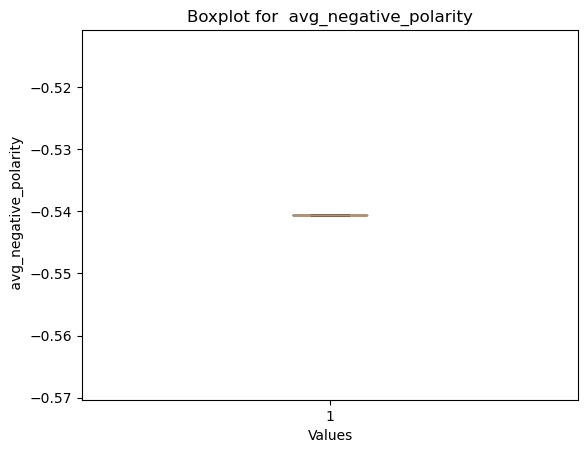

In [ ]:
#plot to see that there are no outliers left

for column in X.columns:
    plt.figure()
    plt.boxplot(X_train[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel('Values')
    plt.ylabel(column)
    plt.show()

In [21]:
print(X_train)

        timedelta   n_tokens_title   n_tokens_content   n_unique_tokens   
2361        692.0              9.0              227.0          0.264133  \
3480        671.0             10.0              262.0          0.640316   
6758        605.0              9.0              165.0          0.756250   
32204       124.0             10.0              943.0          0.470398   
13041       479.0             12.0              262.0          0.567460   
...           ...              ...                ...               ...   
6265        616.0              8.0              123.0          0.723577   
11284       516.0             11.0             1421.0          0.624390   
38158        35.0             11.0              172.0          0.666667   
860         716.0              7.0               90.0          0.865169   
15795       427.0             10.0              290.0          0.680702   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs   
2361                 1.0        

In [118]:
#no more outliers

IQR(X_train, X.columns)

lower      min  num_lower   
 timedelta                     -4.030000e+02  8.00000          0  \
 n_tokens_title                 4.500000e+00  2.00000         34   
 n_tokens_content              -4.590000e+02  0.00000          0   
 n_unique_tokens                2.641326e-01  0.00000       1308   
 n_non_stop_words               1.000000e+00  0.00000       2826   
 n_non_stop_unique_tokens       4.324041e-01  0.00000       1591   
 num_hrefs                     -1.100000e+01  0.00000          0   
 num_self_hrefs                -3.500000e+00  0.00000          0   
 num_imgs                      -3.500000e+00  0.00000          0   
 num_videos                    -1.500000e+00  0.00000          0   
 average_token_length           3.913752e+00  0.00000       1236   
 num_keywords                   1.500000e+00  1.00000         51   
 data_channel_is_lifestyle      0.000000e+00  0.00000          0   
 data_channel_is_entertainment  0.000000e+00  0.00000          0   
 data_channel_is_bus            0.000000e+00  0.00000          0   
 data_channel_is_socmed         0.000000e+00  0.00000          0   
 data_channel_is_tech           0.000000e+00  0.00000          0   
 data_channel_is_world          0.000000e+00  0.00000          0   
 kw_min_min                    -8.500000e+00 -1.00000          0   
 kw_max_min                    -3.875000e+02  0.00000          0   
 kw_avg_min                    -1.811250e+02 -1.00000          0   
 kw_min_max                    -1.185000e+04  0.00000          0   
 kw_max_max                     8.433000e+05  0.00000       9440   
 kw_avg_max                    -6.435281e+04  0.00000          0   
 kw_min_avg                    -3.085172e+03 -1.00000          0   
 kw_max_avg                    -1.246769e+02  0.00000          0   
 kw_avg_avg                     5.557771e+02  0.00000         85   
 self_reference_min_shares     -2.302500e+03  0.00000          0   
 self_reference_max_shares     -9.250000e+03  0.00000          0   
 self_reference_avg_sharess    -5.347031e+03  0.00000          0   
 weekday_is_monday              0.000000e+00  0.00000          0   
 weekday_is_tuesday             0.000000e+00  0.00000          0   
 weekday_is_wednesday           0.000000e+00  0.00000          0   
 weekday_is_thursday            0.000000e+00  0.00000          0   
 weekday_is_friday              0.000000e+00  0.00000          0   
 weekday_is_saturday            0.000000e+00  0.00000          0   
 weekday_is_sunday              0.000000e+00  0.00000          0   
 is_weekend                     0.000000e+00  0.00000          0   
 LDA_00                        -2.988107e-01  0.00000          0   
 LDA_01                        -1.637161e-01  0.00000          0   
 LDA_02                        -4.298982e-01  0.00000          0   
 LDA_03                        -4.922152e-01  0.00000          0   
 LDA_04                        -5.285445e-01  0.00000          0   
 global_subjectivity            2.279167e-01  0.00000       1438   
 global_sentiment_polarity     -1.223549e-01 -0.39375        343   
 global_rate_positive_words    -4.458296e-03  0.00000          0   
 global_rate_negative_words    -8.570234e-03  0.00000          0   
 rate_positive_words            3.000000e-01  0.00000       1594   
 rate_negative_words           -1.139601e-01  0.00000          0   
 avg_positive_polarity          1.484671e-01  0.00000       1463   
 min_positive_polarity         -2.500000e-02  0.00000          0   
 max_positive_polarity         -1.110223e-16  0.00000          0   
 avg_negative_polarity         -5.405993e-01 -1.00000        865   
 min_negative_polarity         -1.300000e+00 -1.00000          0   
 max_negative_polarity         -2.375000e-01 -1.00000       2454   
 title_subjectivity            -7.500000e-01  0.00000          0   
 title_sentiment_polarity      -2.250000e-01 -1.00000       2706   
 abs_title_subjectivity        -3.333333e-01  0.00000          0   
 abs_title_sentiment_polari